In [1]:
#Time series analysis and feature analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
from pandas.tseries.offsets import QuarterBegin
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#time series
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
# Load the dataset with the specified colon separator
file_path = 'Spotify_Dataset_V3.csv' 
df = pd.read_csv(file_path, sep=';')
df

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651931,197,Oh Lord,MiC LOWRY,01/01/2017,0.273,0.794,-6644.0,0.068,0.022,0.000,0.377,Artist 1,MiC LOWRY,Nationality 1,United Kingdom,Europe,4,4.0,1sTUEdVO85YU8Ymk2jeAls,https://open.spotify.com/track/1sTUEdVO85YU8Ym...
651932,198,Superstition - Single Version,Stevie Wonder,01/01/2017,0.650,0.658,-10908.0,0.085,0.089,0.004,0.883,Artist 1,Stevie Wonder,Nationality 1,United States,Anglo-America,3,3.0,5lXcSvHRVjQJ3LB2rLKQog,https://open.spotify.com/track/5lXcSvHRVjQJ3LB...
651933,199,Secrets,The Weeknd,01/01/2017,0.665,0.771,-5779.0,0.053,0.016,0.000,0.764,Artist 1,The Weeknd,Nationality 1,Canada,Anglo-America,2,2.0,3DX4Y0egvc0slLcLl31h2p,https://open.spotify.com/track/3DX4Y0egvc0slLc...
651934,200,Ni**as In Paris,"JAY-Z, Kanye West",01/01/2017,0.757,0.882,-6125.0,0.248,0.076,0.000,0.684,Artist 1,JAY-Z,Nationality 1,United States,Anglo-America,1,1.0,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...


In [5]:
df.columns

Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality',
       'Nationality', 'Continent', 'Points (Total)',
       'Points (Ind for each Artist/Nat)', 'id', 'Song URL'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651936 entries, 0 to 651935
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Rank                              651936 non-null  int64  
 1   Title                             651936 non-null  object 
 2   Artists                           651936 non-null  object 
 3   Date                              651936 non-null  object 
 4   Danceability                      651936 non-null  float64
 5   Energy                            651936 non-null  float64
 6   Loudness                          651936 non-null  float64
 7   Speechiness                       651936 non-null  float64
 8   Acousticness                      651936 non-null  float64
 9   Instrumentalness                  651936 non-null  float64
 10  Valence                           651936 non-null  float64
 11  # of Artist                       651936 non-null  o

In [7]:
df.isnull().sum()

Rank                                0
Title                               0
Artists                             0
Date                                0
Danceability                        0
Energy                              0
Loudness                            0
Speechiness                         0
Acousticness                        0
Instrumentalness                    0
Valence                             0
# of Artist                         0
Artist (Ind.)                       0
# of Nationality                    0
Nationality                         0
Continent                           0
Points (Total)                      0
Points (Ind for each Artist/Nat)    0
id                                  0
Song URL                            0
dtype: int64

In [8]:
df.describe()

,Rank,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total),Points (Ind for each Artist/Nat)
count,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000
mean,100.407782,0.697730,0.652049,-5295.645217,0.109946,0.230694,0.007647,0.523134,100.592218,72.391141
std,57.406664,0.133186,0.155684,2785.261321,0.096841,0.230710,0.054724,0.223926,57.406664,54.227892
min,1.000000,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,1.000000,0.200000
25%,51.000000,0.617000,0.549000,-6825.000000,0.045000,0.048000,0.000000,0.356000,51.000000,28.000000
50%,100.000000,0.719000,0.671000,-5206.000000,0.068000,0.152000,0.000000,0.521000,101.000000,60.000000
75%,150.000000,0.793000,0.771000,-3885.000000,0.136000,0.349000,0.000000,0.696000,150.000000,104.000000
max,200.000000,0.985000,0.996000,1509.000000,0.966000,0.994000,0.956000,0.982000,200.000000,200.000000


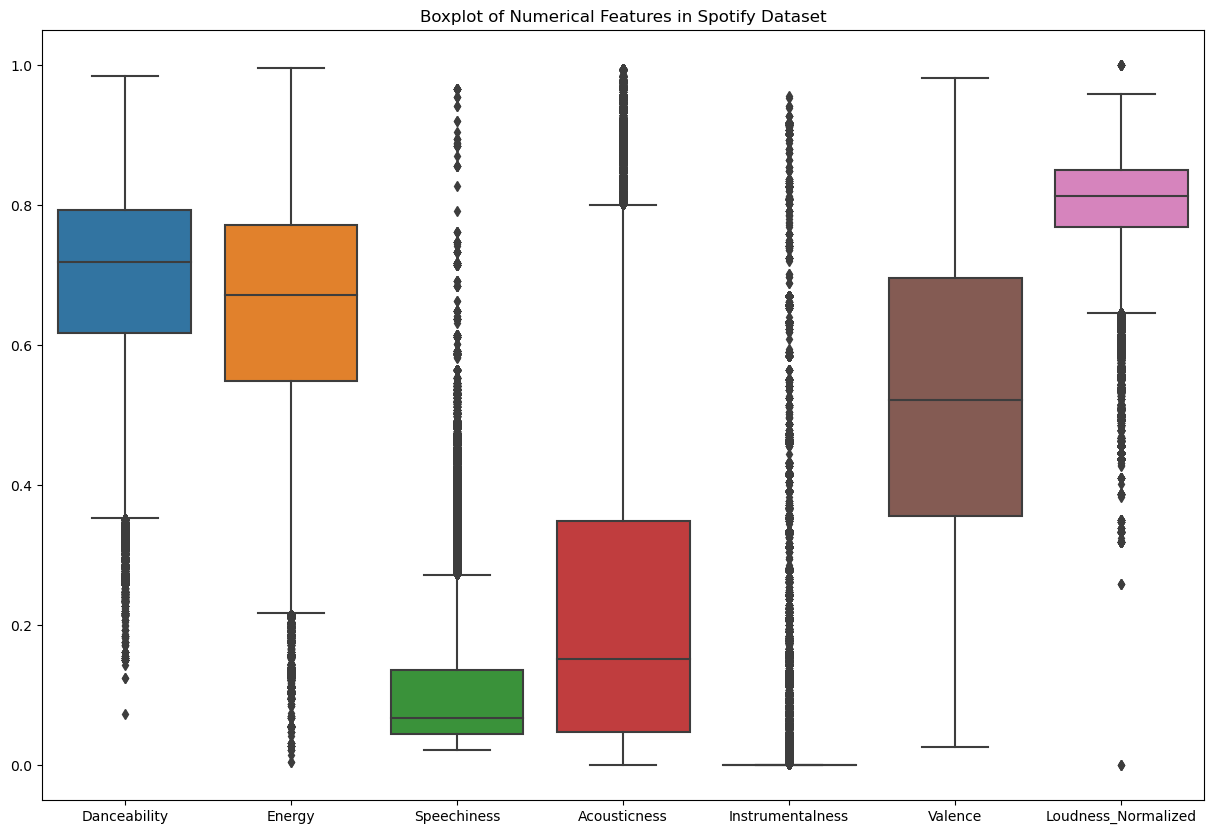

In [4]:
scaler = MinMaxScaler()
loudness = df['Loudness'].values.reshape(-1, 1)
df['Loudness_Normalized'] = scaler.fit_transform(loudness)
# List of relevant numerical features
numerical_features = ['Danceability', 
                      'Energy', 
                      'Speechiness', 
                      'Acousticness', 
                      'Instrumentalness', 
                      'Valence', 
                      'Loudness_Normalized'] 

# Create a boxplot of the above features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_features])
plt.title('Boxplot of Numerical Features in Spotify Dataset')
plt.savefig('boxplot.png')
plt.show()

/tmp/ipykernel_236/4063351835.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


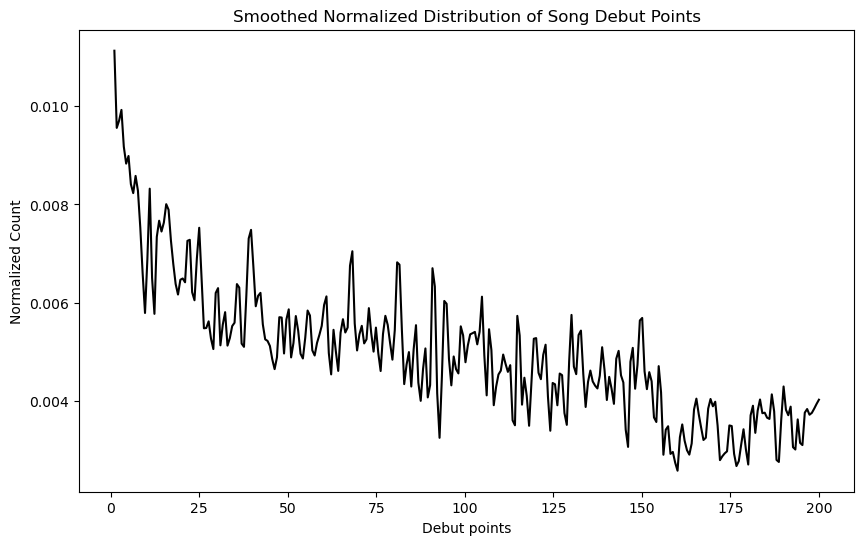

In [5]:


# Convert the date column to datetime type for sorting and comparison
df['Date'] = pd.to_datetime(df['Date'])

# Find the debut rank for each song when it first appears on the chart
debut_ranks = df.sort_values(by=['Title', 'Date']).groupby('Title').first()['Points (Total)']

# Calculate the frequency of each rank, and sort them
debut_counts = debut_ranks.value_counts().sort_index()

# Normalize the frequencies so that their sum equals 1
normalized_counts = debut_counts / debut_counts.sum()

# To smooth the curve, we will use make_interp_spline to create an interpolation function
x_new = np.linspace(normalized_counts.index.min(), normalized_counts.index.max(), 300)
spl = make_interp_spline(normalized_counts.index, normalized_counts.values, k=3)  # k is the order of the smoothing spline
y_smooth = spl(x_new)

# Plot the smoothed curve
plt.figure(figsize=(10, 6))
plt.plot(x_new, y_smooth, color='black')

# Add title and labels
plt.title('Smoothed Normalized Distribution of Song Debut Points')
plt.xlabel('Debut points')
plt.ylabel('Normalized Count')

# Show the plot
#plt.savefig('debut.svg')
plt.show()


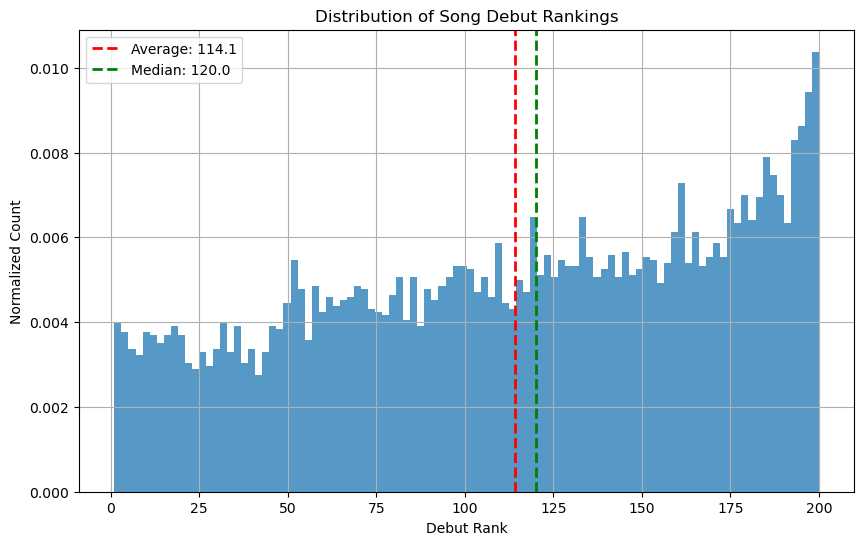

The average debut rank is: 114.1
The median debut rank is: 120.0
Percentage of songs with a debut rank above 50: 17.53%
Percentage of songs that debuted at the top rank: 0.40%


In [6]:


# Ensure the Date column is of datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Find the first appearance of each song on the chart
df_first_appearance = df.sort_values(by=['Title', 'Date']).drop_duplicates(subset='Title', keep='first')

# Plot a histogram of debut rankings
plt.figure(figsize=(10, 6))
df_first_appearance['Rank'].hist(bins=100, density=True, alpha=0.75)

# Calculate the average and median
average_debut = df_first_appearance['Rank'].mean()
median_debut = df_first_appearance['Rank'].median()

# Annotate the average and median on the plot
plt.axvline(average_debut, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_debut:.1f}')
plt.axvline(median_debut, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_debut:.1f}')

# Calculate the percentage of songs with a debut rank above 50
percentage_above_50 = (df_first_appearance['Rank'] <= 50).mean() * 100

# Calculate the percentage of songs that debuted at the top rank (e.g., rank 1)
percentage_top_ranked = (df_first_appearance['Rank'] == 1).mean() * 100

plt.xlabel('Debut Rank')
plt.ylabel('Normalized Count')
plt.title('Distribution of Song Debut Rankings')
plt.legend()
#plt.savefig('debut_new.png')
plt.show()

# Print the average and median
print(f'The average debut rank is: {average_debut:.1f}')
print(f'The median debut rank is: {median_debut:.1f}')
print(f'Percentage of songs with a debut rank above 50: {percentage_above_50:.2f}%')
print(f'Percentage of songs that debuted at the top rank: {percentage_top_ranked:.2f}%')


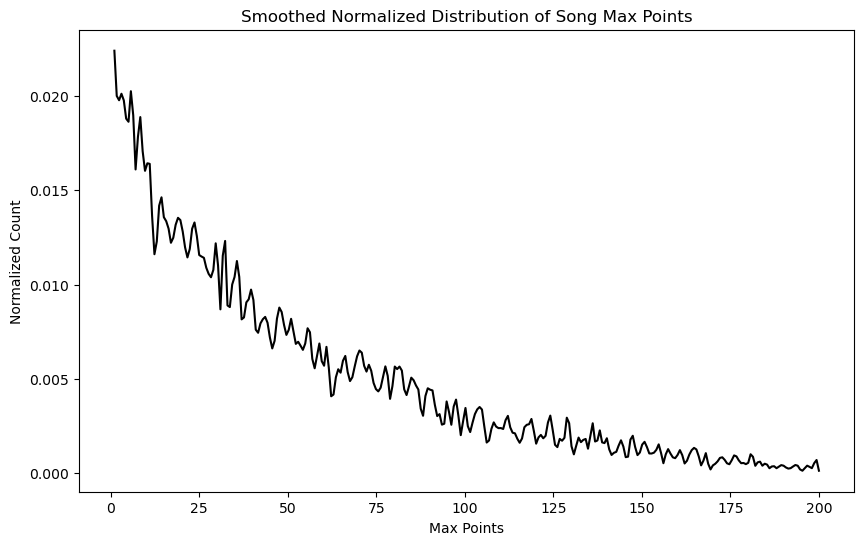

In [7]:


# Ensure the Date column is of datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Find out the highest rank of each song on the chart
max_ranks = df.sort_values(by=['Title', 'Date'], ascending=[True, False]).groupby('Title').first()['Points (Total)']

# Calculate the frequency of each rank, and sort them
max_rank_counts = max_ranks.value_counts().sort_index()

# Normalize the frequencies so that their sum equals 1
normalized_counts = max_rank_counts / max_rank_counts.sum()

# To smooth the curve, we will use make_interp_spline to create an interpolation function
x_new = np.linspace(normalized_counts.index.min(), normalized_counts.index.max(), 300)
spl = make_interp_spline(normalized_counts.index, normalized_counts.values, k=3)  # k is the order of the smoothing spline
y_smooth = spl(x_new)

# Plot the smoothed curve
plt.figure(figsize=(10, 6))
plt.plot(x_new, y_smooth, color='black')

# Add title and labels
plt.title('Smoothed Normalized Distribution of Song Max Points')
plt.xlabel('Max Points')
plt.ylabel('Normalized Count')

# Display the plot
plt.show()


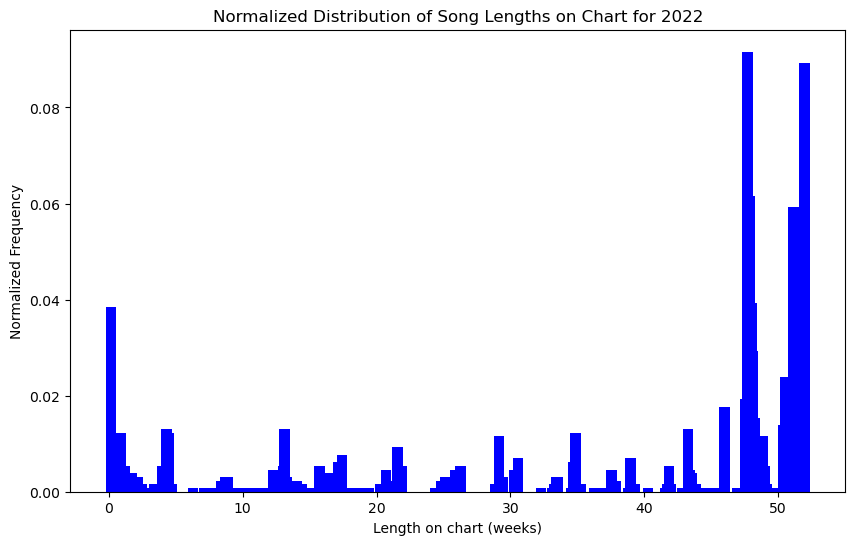

In [8]:


# Define start and end of the year 2022
start_of_2022 = pd.to_datetime('2022-01-01')
end_of_2022 = pd.to_datetime('2022-12-31')

# Calculate the length of time each song appears on the chart within 2022 (in weeks)
# Adjust the 'min' and 'max' dates to fall within 2022
song_lengths = df.groupby('id')['Date'].agg(['min', 'max'])
song_lengths['min'] = song_lengths['min'].clip(lower=start_of_2022)
song_lengths['max'] = song_lengths['max'].clip(upper=end_of_2022)
song_lengths['Length'] = (song_lengths['max'] - song_lengths['min']).dt.days / 7

# Filter out songs that don't appear in 2022 at all
song_lengths_2022 = song_lengths[(song_lengths['min'].dt.year == 2022) & (song_lengths['Length'] > 0)]

# Calculate the frequency of each length (in weeks) and normalize it
length_counts = song_lengths_2022['Length'].value_counts().sort_index()
normalized_counts = length_counts / length_counts.sum()

# Plot the normalized frequency distribution
plt.figure(figsize=(10, 6))
plt.bar(normalized_counts.index, normalized_counts.values, color='blue')

# Add titles and labels
plt.title('Normalized Distribution of Song Lengths on Chart for 2022')
plt.xlabel('Length on chart (weeks)')
plt.ylabel('Normalized Frequency')

# Show the plot
plt.show()


/tmp/ipykernel_140/654054585.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=normalized_counts_year.index, y=normalized_counts_year.values, label=f'{year}', palette=palette[i])
/tmp/ipykernel_140/654054585.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=normalized_counts_year.index, y=normalized_counts_year.values, label=f'{year}', palette=palette[i])
/tmp/ipykernel_140/654054585.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=normalized_counts_year.index, y=normalized_counts_year.values, label=f'{year}', palette=palette[i])
/tmp/ipykernel_140/654054585.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=normalized_counts_year.index, y=normalized_counts_year.values, label=f'{year}', palette=palette[i])
/tmp/ipykernel_140/654054585.py:34: UserWarning: Ignoring `palette` because no `

NameError: name 'song_lengths_period' is not defined

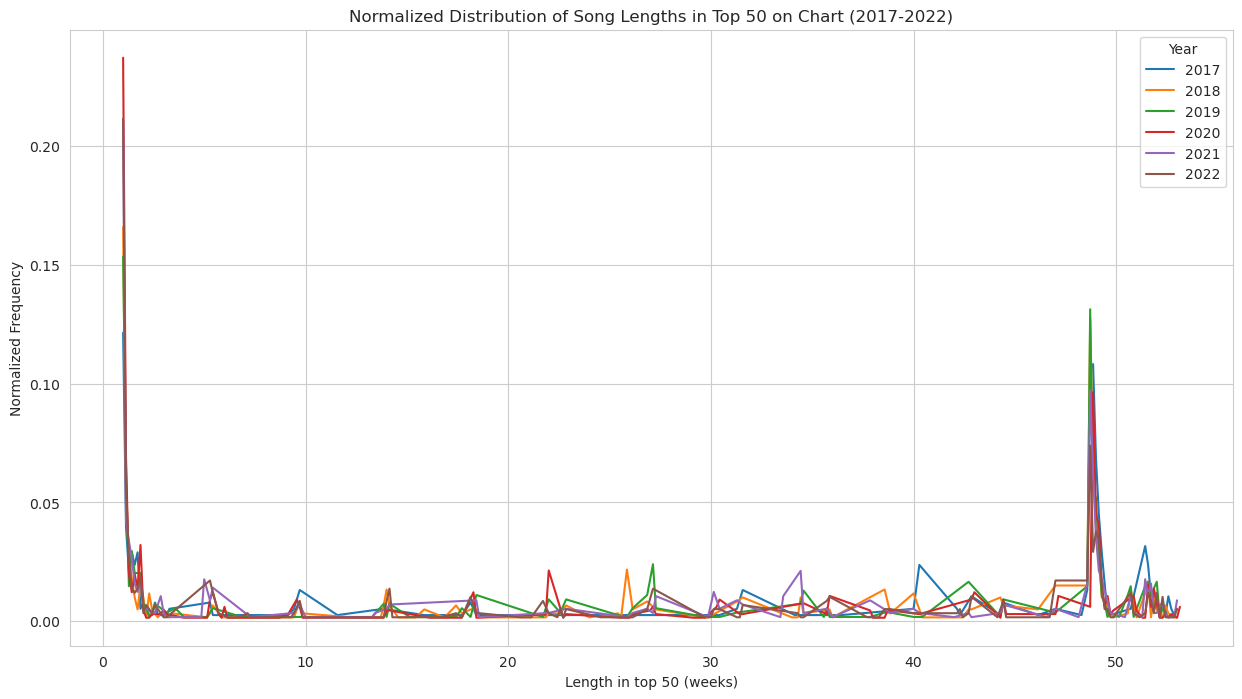

In [8]:


# Let's set the aesthetic style of the plots
sns.set_style('whitegrid')

# Initialize a figure
plt.figure(figsize=(15, 8))

# Define a color palette
palette = sns.color_palette("husl", 6)  # 6 distinct colors for the years 2017-2022

# Loop through each year from 2017 to 2022
for i, year in enumerate(range(2017, 2023)):
    start_of_year = pd.to_datetime(f'{year}-01-01')
    end_of_year = pd.to_datetime(f'{year}-12-31')
    
    # Filter the DataFrame for the given year and ranks within top 50
    df_year = df[(df['Date'] >= start_of_year) & (df['Date'] <= end_of_year) & (df['Rank'] <= 50)]
    
    # Calculate the length of time each song appears in the top 50 for the given year (in weeks)
    song_lengths_year = df_year.groupby('id')['Date'].agg(['min', 'max'])
    song_lengths_year['Length'] = ((song_lengths_year['max'] - song_lengths_year['min']).dt.days / 7) + 1  # +1 to include both start and end week
    
    # Calculate the frequency of each length (in weeks) and normalize it
    length_counts_year = song_lengths_year['Length'].value_counts().sort_index()
    normalized_counts_year = length_counts_year / length_counts_year.sum()
    
    # Plot the normalized frequency distribution for the given year
    sns.lineplot(x=normalized_counts_year.index, y=normalized_counts_year.values, label=f'{year}', palette=palette[i])

# Add titles and labels
plt.title('Normalized Distribution of Song Lengths in Top 50 on Chart (2017-2022)')
plt.xlabel('Length in top 50 (weeks)')
plt.ylabel('Normalized Frequency')
plt.legend(title='Year')

# Find out the percentage of songs that stayed on the chart for only one week
one_week_songs = song_lengths_period[song_lengths_period['Length'] == 1].shape[0]
total_songs = song_lengths_period.shape[0]
percentage_one_week = (one_week_songs / total_songs) * 100

# Find out the percentage of songs that stayed on the chart for more than 50 weeks
over_fifty_week_songs = song_lengths_period[song_lengths_period['Length'] > 48].shape[0]
percentage_over_fifty_weeks = (over_fifty_week_songs / total_songs) * 100

# Output the analysis
print(f"Percentage of songs that were on the chart for only one week: {percentage_one_week:.2f}%")
print(f"Percentage of songs that were on the chart for more than 50 weeks: {percentage_over_fifty_weeks:.2f}%")

# Show the plot
plt.savefig('length.png')
plt.show()


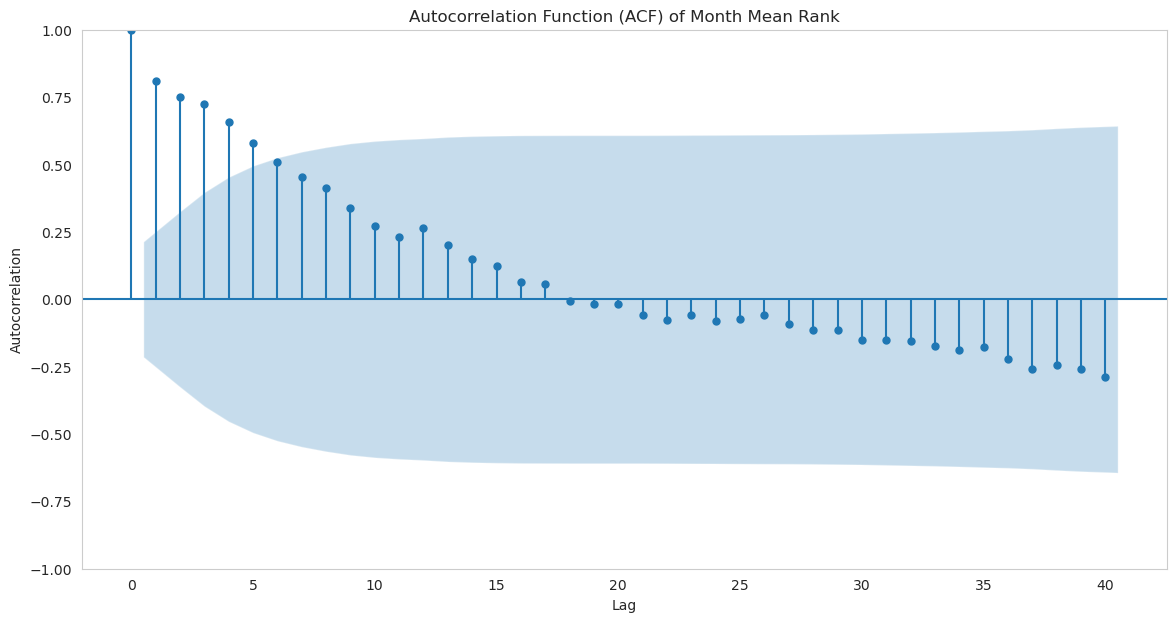

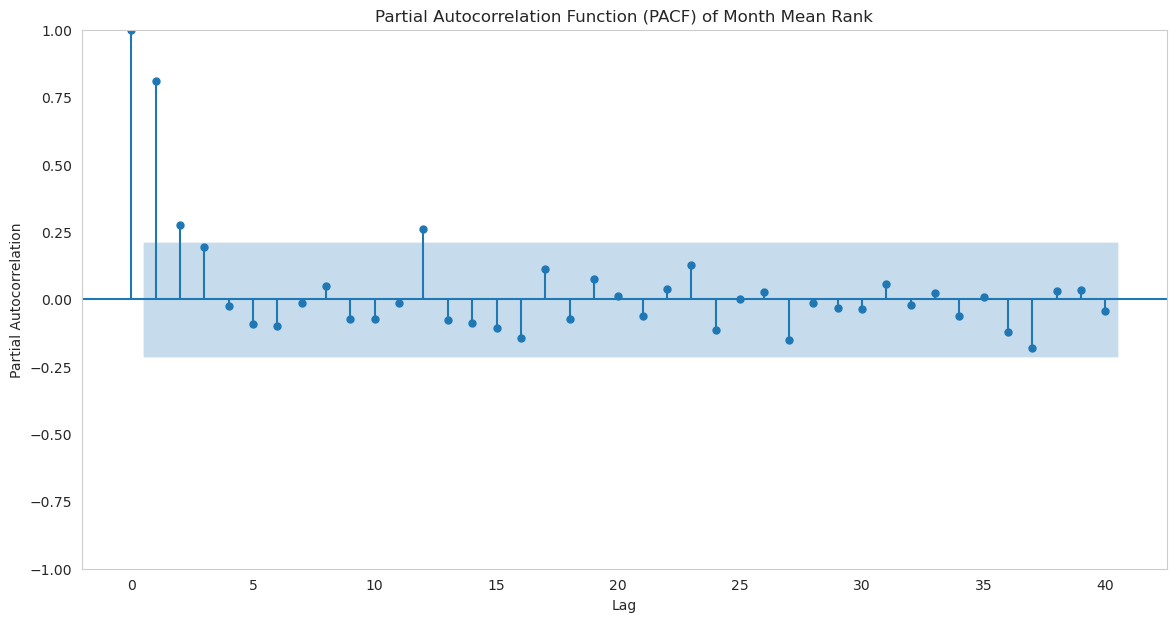

In [30]:

# Resample the data to get weekly means
month_mean = df.resample('M', on='Date')['Rank'].mean()

# Drop NA values that may result from resampling if there are weeks with no data
month_mean = month_mean.dropna()

# Generate a plot of the autocorrelation function (ACF)
fig, ax = plt.subplots(figsize=(14, 7))
sm.graphics.tsa.plot_acf(month_mean, lags=40, ax=ax)
plt.title('Autocorrelation Function (ACF) of Month Mean Rank')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
ax.grid(False) 
plt.savefig('ACF1.png')
plt.show()

# If you want to plot the partial autocorrelation function (PACF), use the following:
fig, ax = plt.subplots(figsize=(14, 7))
sm.graphics.tsa.plot_pacf(month_mean, lags=40, ax=ax)
plt.title('Partial Autocorrelation Function (PACF) of Month Mean Rank')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
ax.grid(False)
plt.savefig('ACF2.png')
plt.show()



Results of Dickey-Fuller Test:
Test Statistic                 -2.441850
p-value                         0.130271
#Lags Used                      6.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


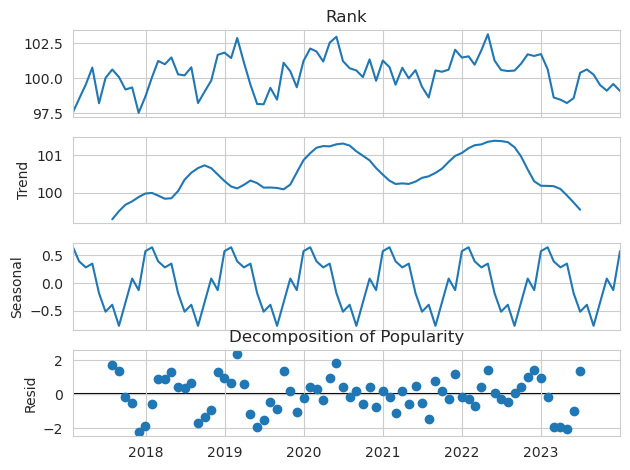

Text(0.5, 0, 'Date')

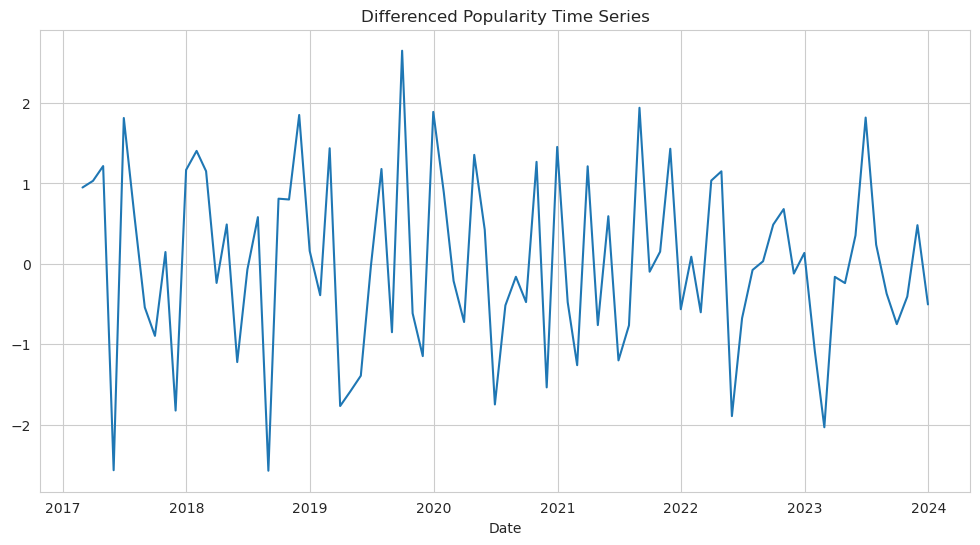

In [10]:



# Define function for ADF test
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

# Apply ADF test on the series
adf_test(month_mean)



# Decomposition
pop_decomposition = sm.tsa.seasonal_decompose(month_mean, model='additive')
fig = pop_decomposition.plot()
plt.title('Decomposition of Popularity')
plt.show()

# Differencing the time series to make it stationary
month_mean = month_mean.diff().dropna()

# Plot the differenced time series
plt.figure(figsize=(12, 6))
plt.plot(month_mean)
plt.title('Differenced Popularity Time Series')
plt.xlabel('Date')

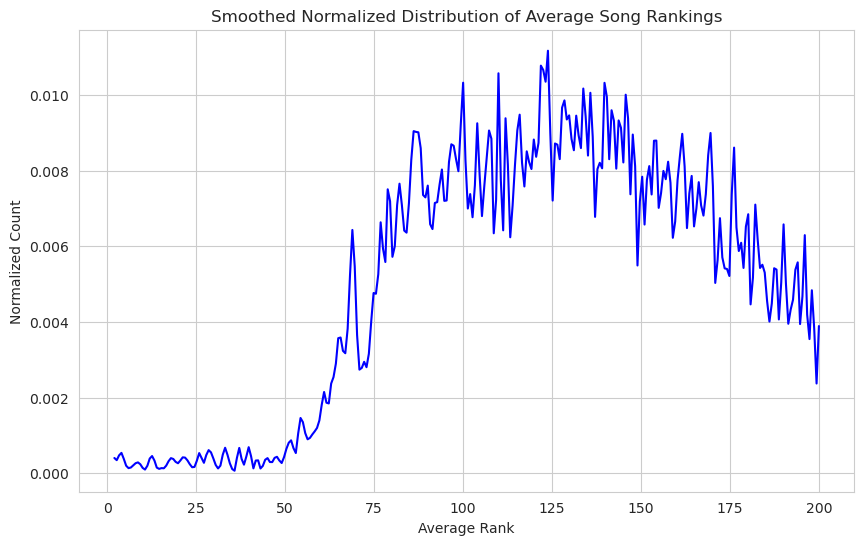

In [11]:


# Ensure the Date column is of datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the average rank for each song
mean_ranks = df.groupby('Title')['Rank'].mean()

# Calculate the frequency distribution of average ranks and sort it
mean_rank_counts = mean_ranks.round().astype(int).value_counts().sort_index()

# Normalize the frequency distribution so that the sum equals 1
normalized_counts = mean_rank_counts / mean_rank_counts.sum()

# Use an interpolation function to create a smooth curve
x_new = np.linspace(normalized_counts.index.min(), normalized_counts.index.max(), 300)
spl = make_interp_spline(normalized_counts.index, normalized_counts.values, k=3)  # k is the level of smoothness of the curve
y_smooth = spl(x_new)

# Plot the smooth curve
plt.figure(figsize=(10, 6))
plt.plot(x_new, y_smooth, color='blue')

# Add title and labels
plt.title('Smoothed Normalized Distribution of Average Song Rankings')
plt.xlabel('Average Rank')
plt.ylabel('Normalized Count')

# Display the plot
plt.show()


/tmp/ipykernel_140/1670626277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipykernel_140/1670626277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarter'] = df['Date'].dt.to_period('Q')


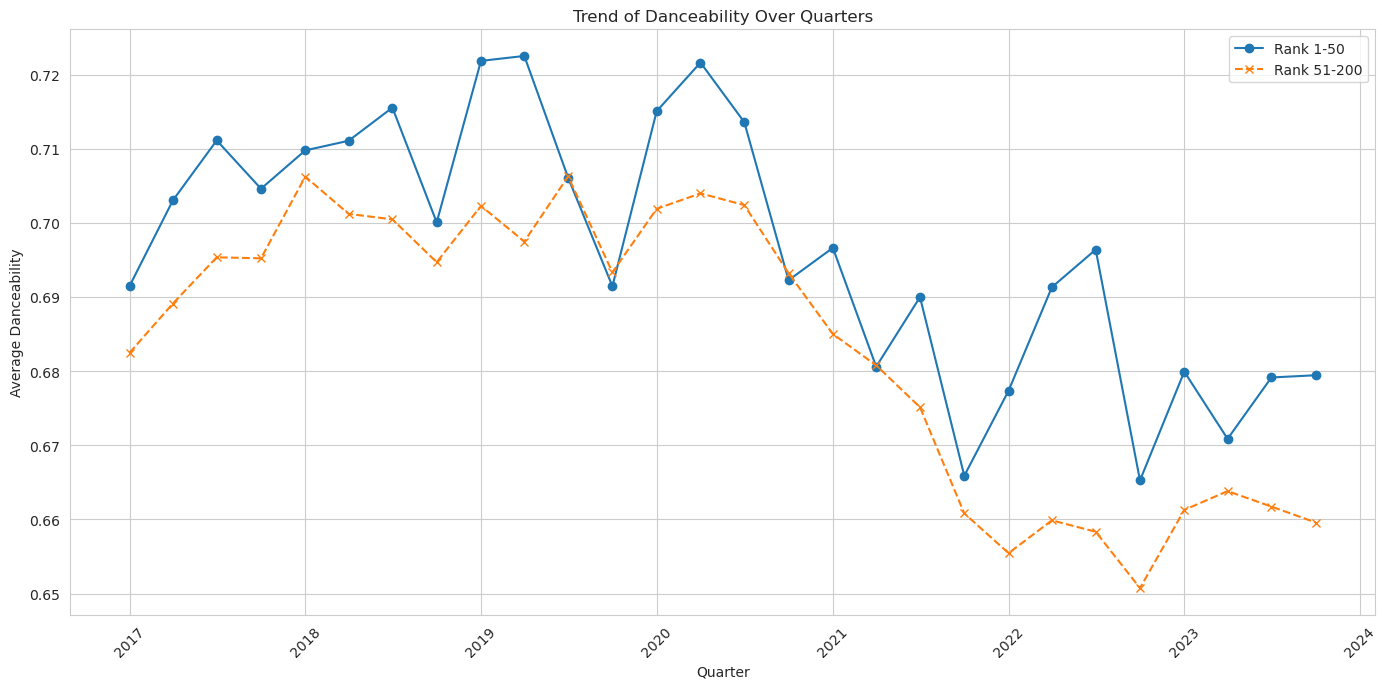

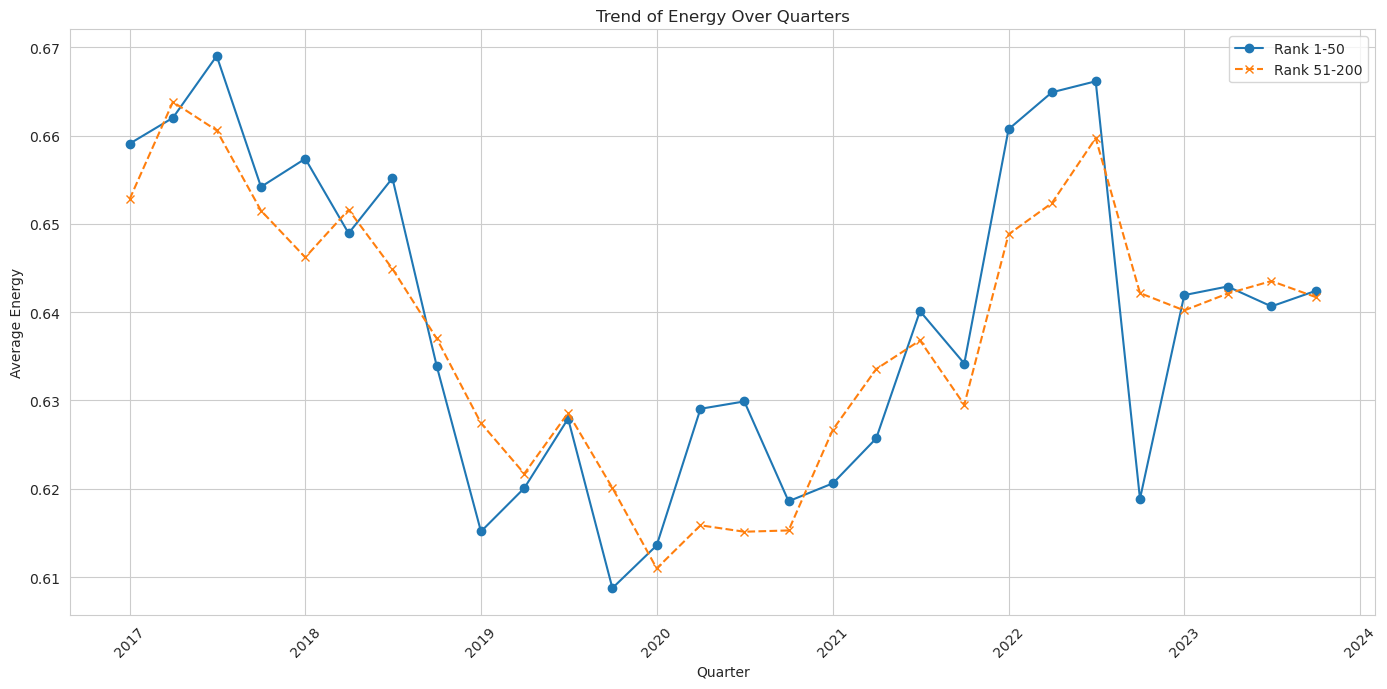

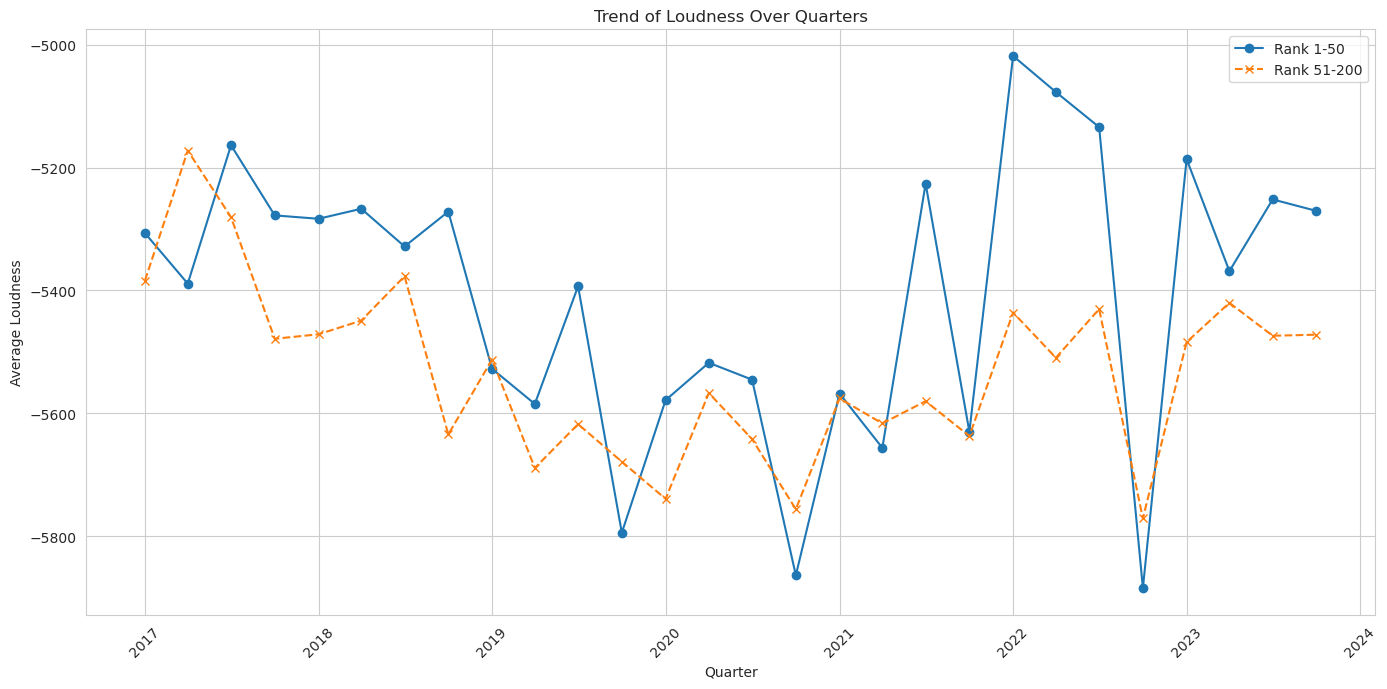

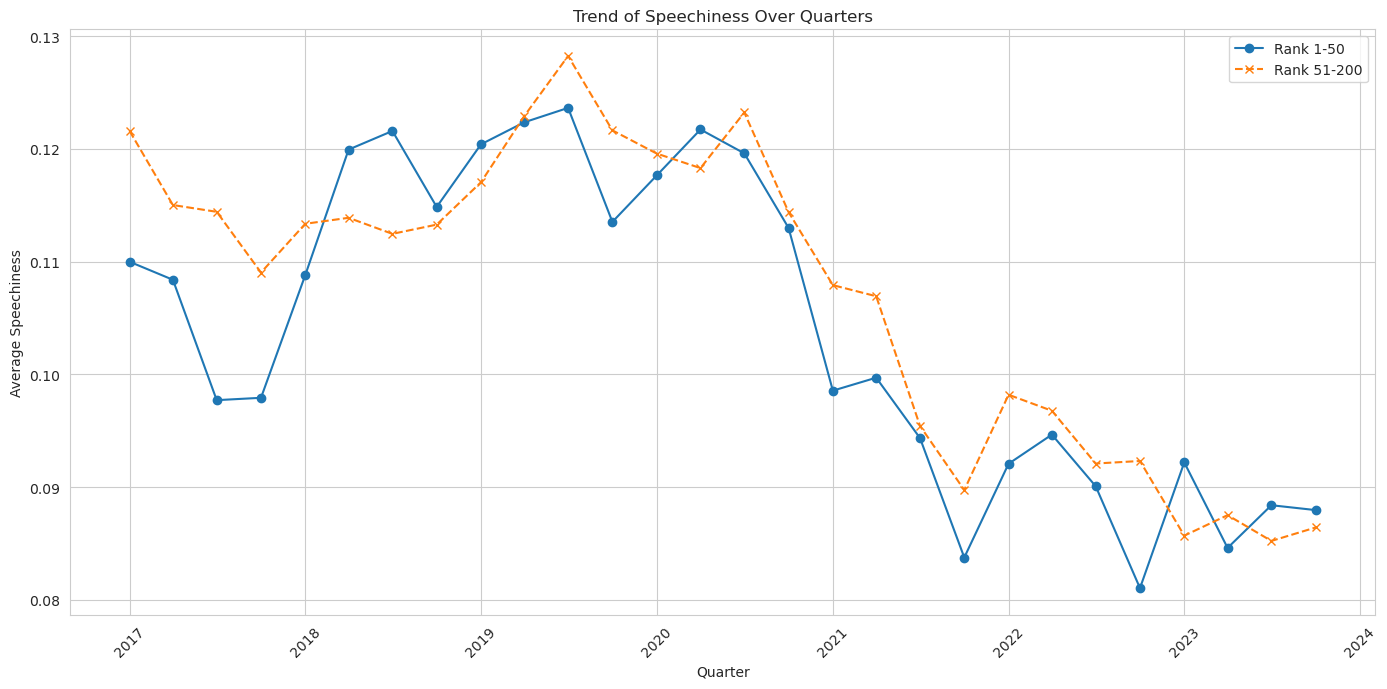

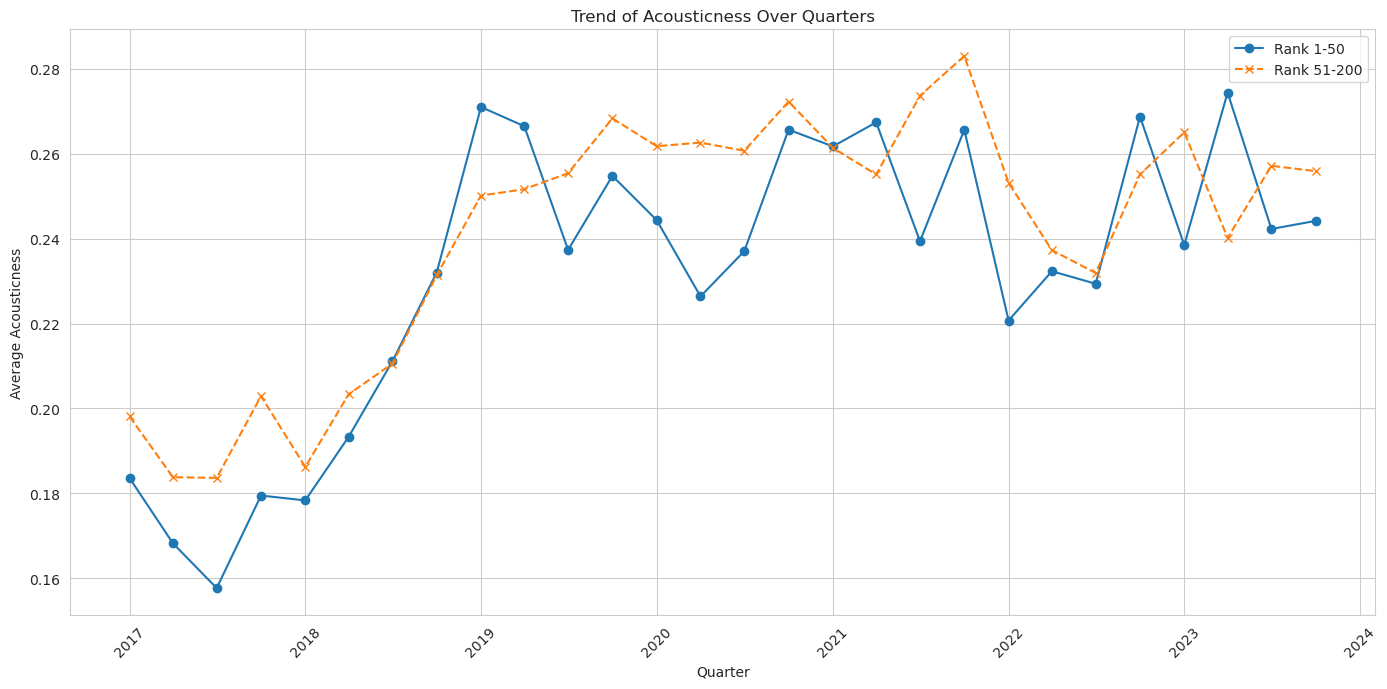

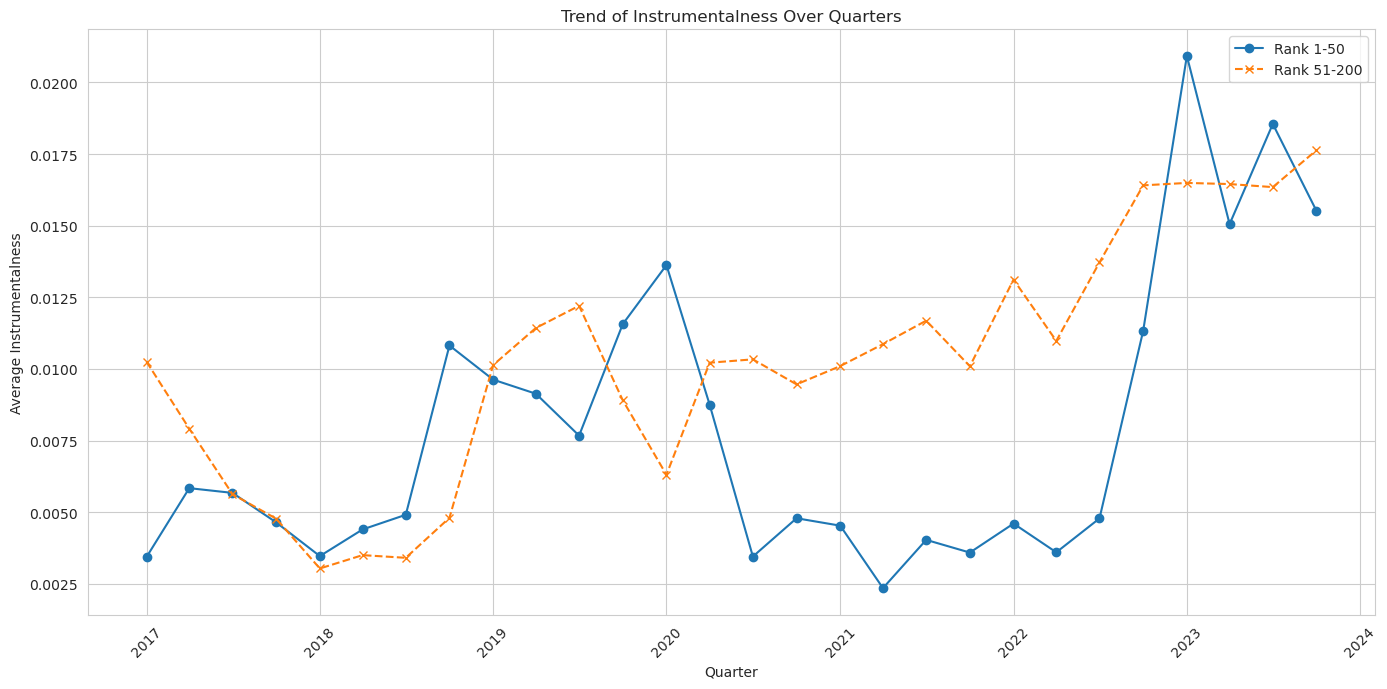

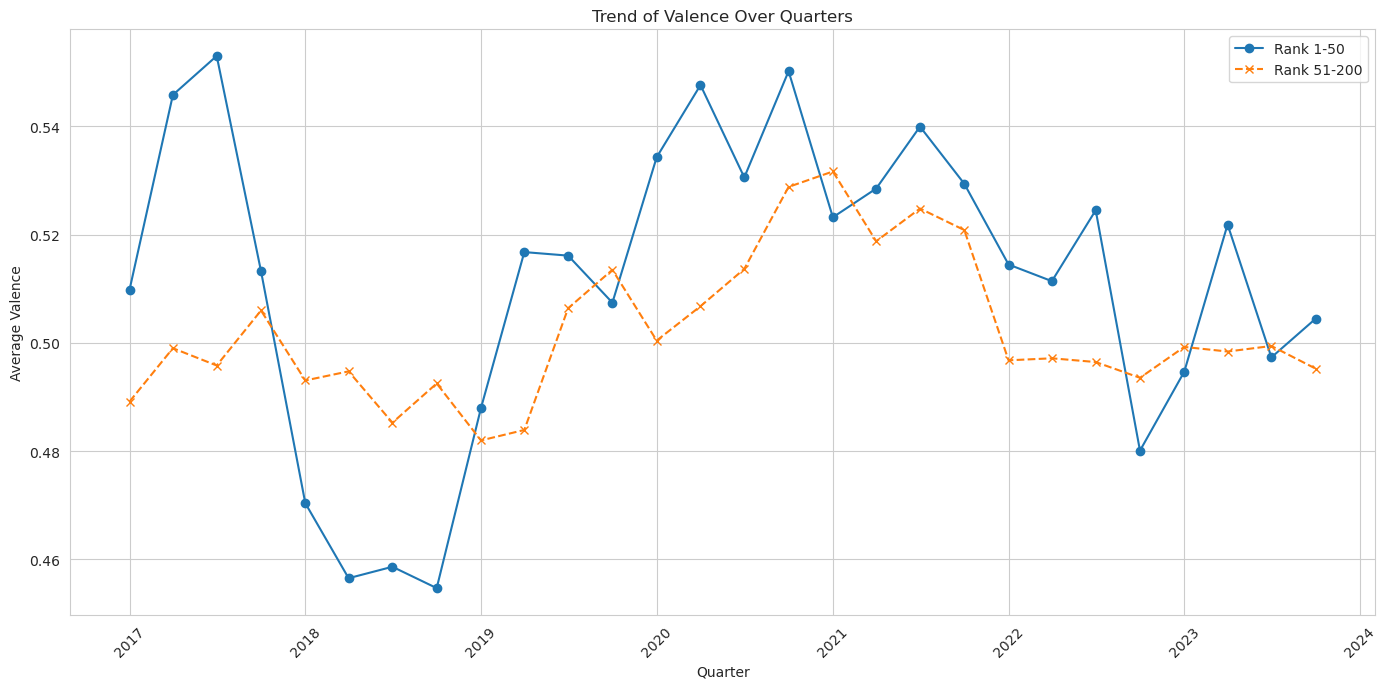

In [24]:
#The difference in each sound variable between the top 50 songs and the bottom 50 songs
# Step 3: Assign a quarter to each record
df['Quarter'] = df['Date'].dt.to_period('Q')

# Step 4: Calculate the average of each musical feature for each quarter
# Only considering data for the top 50 songs

features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']
# Calculate quarterly averages for the top 50 and for ranks 51 to 200
top_50_quarterly_means = df[df['Rank'] <= 50].groupby('Quarter')[features].mean()
bottom_150_quarterly_means = df[df['Rank'].between(51, 200)].groupby('Quarter')[features].mean()

# Convert quarter index to datetime stamps for plotting
top_50_quarterly_means.index = top_50_quarterly_means.index.to_timestamp()
bottom_150_quarterly_means.index = bottom_150_quarterly_means.index.to_timestamp()

# Plot trend charts
for feature in features:
    plt.figure(figsize=(14, 7))
    plt.plot(top_50_quarterly_means.index, top_50_quarterly_means[feature], marker='o', label='Rank 1-50')
    plt.plot(bottom_150_quarterly_means.index, bottom_150_quarterly_means[feature], marker='x', label='Rank 51-200', linestyle='--')
    plt.title(f'Trend of {feature} Over Quarters')
    plt.xlabel('Quarter')
    plt.ylabel(f'Average {feature}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
    plt.show()


/tmp/ipykernel_140/3678901365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipykernel_140/3678901365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
/tmp/ipykernel_140/3678901365.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

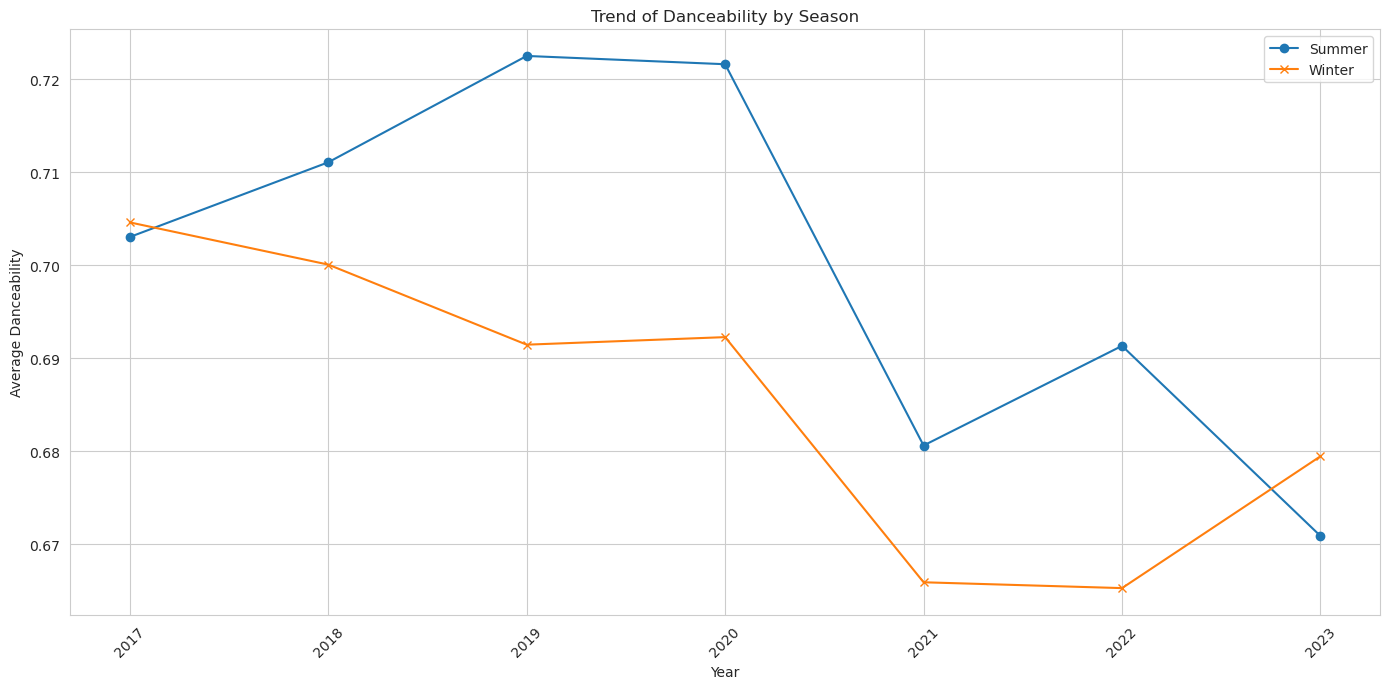

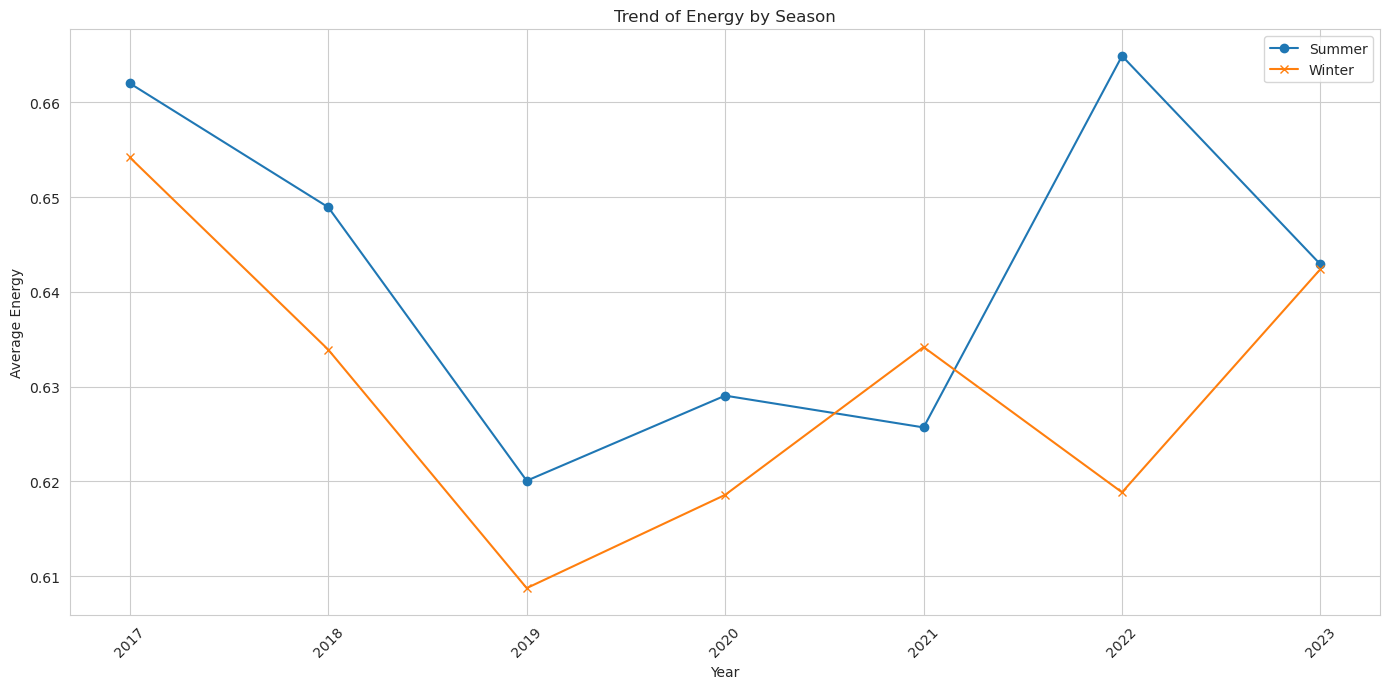

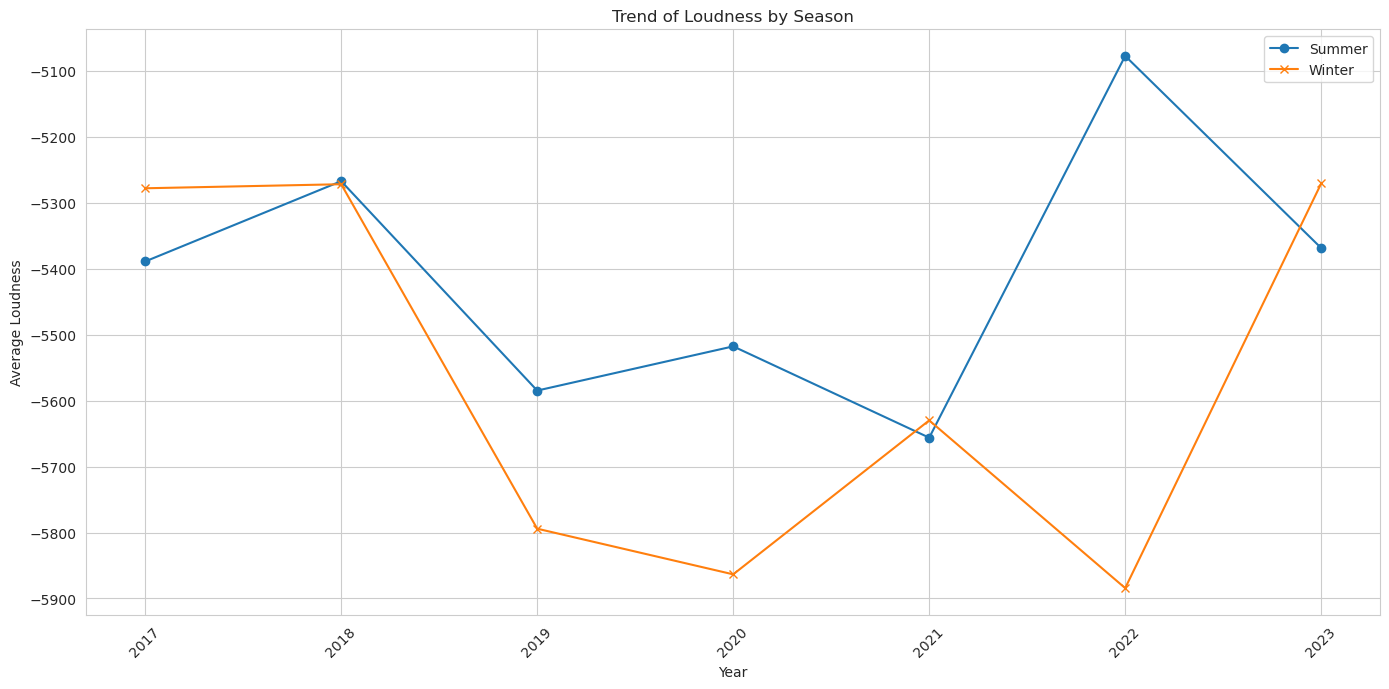

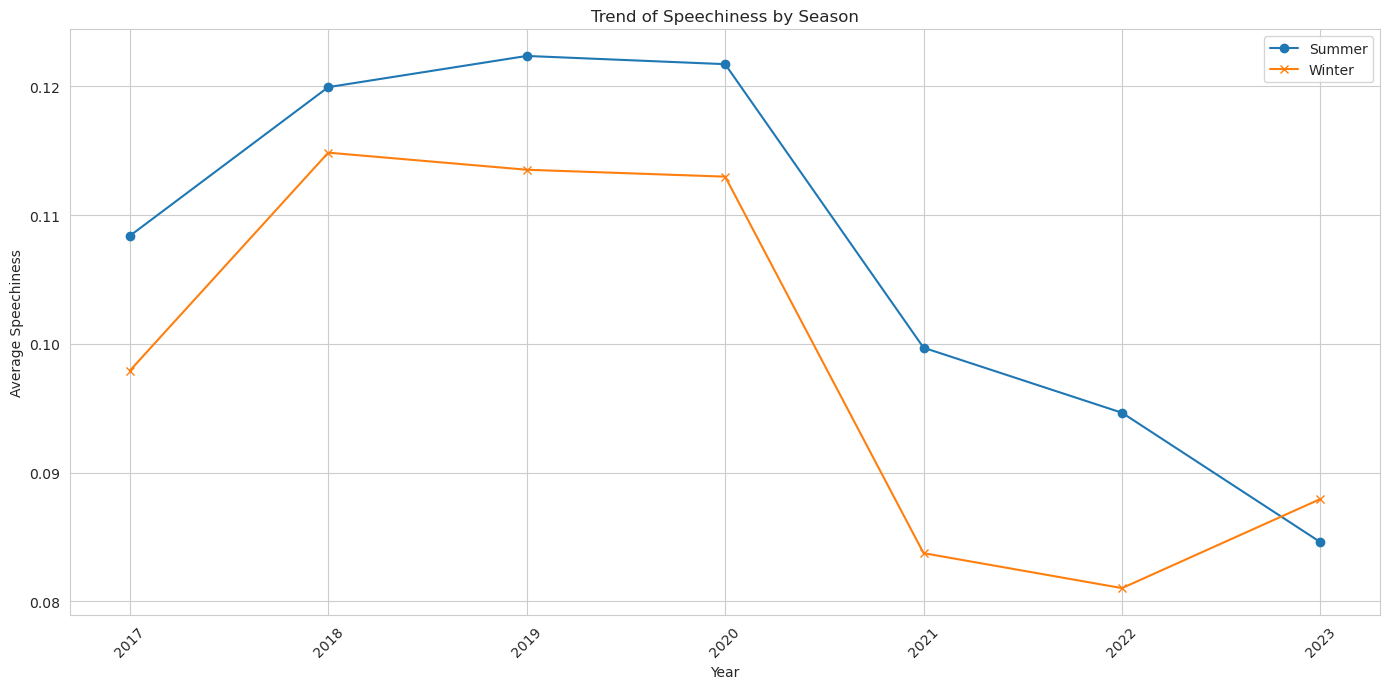

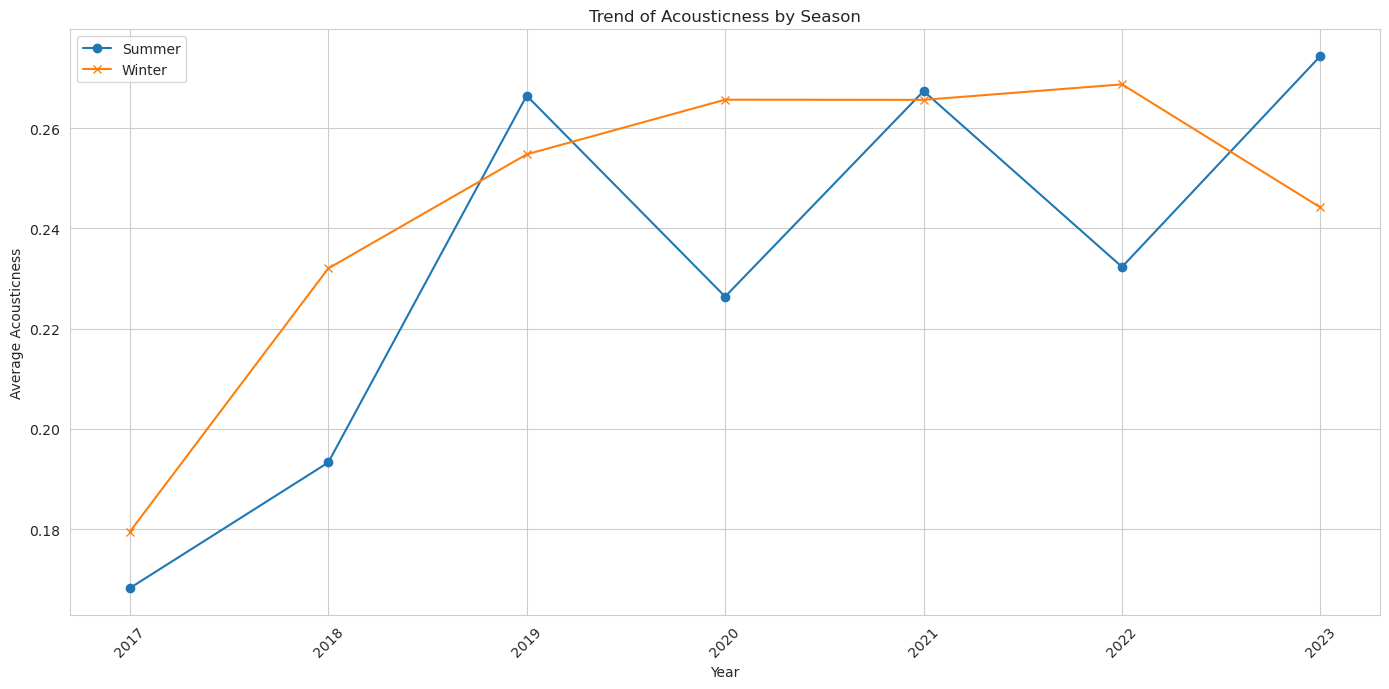

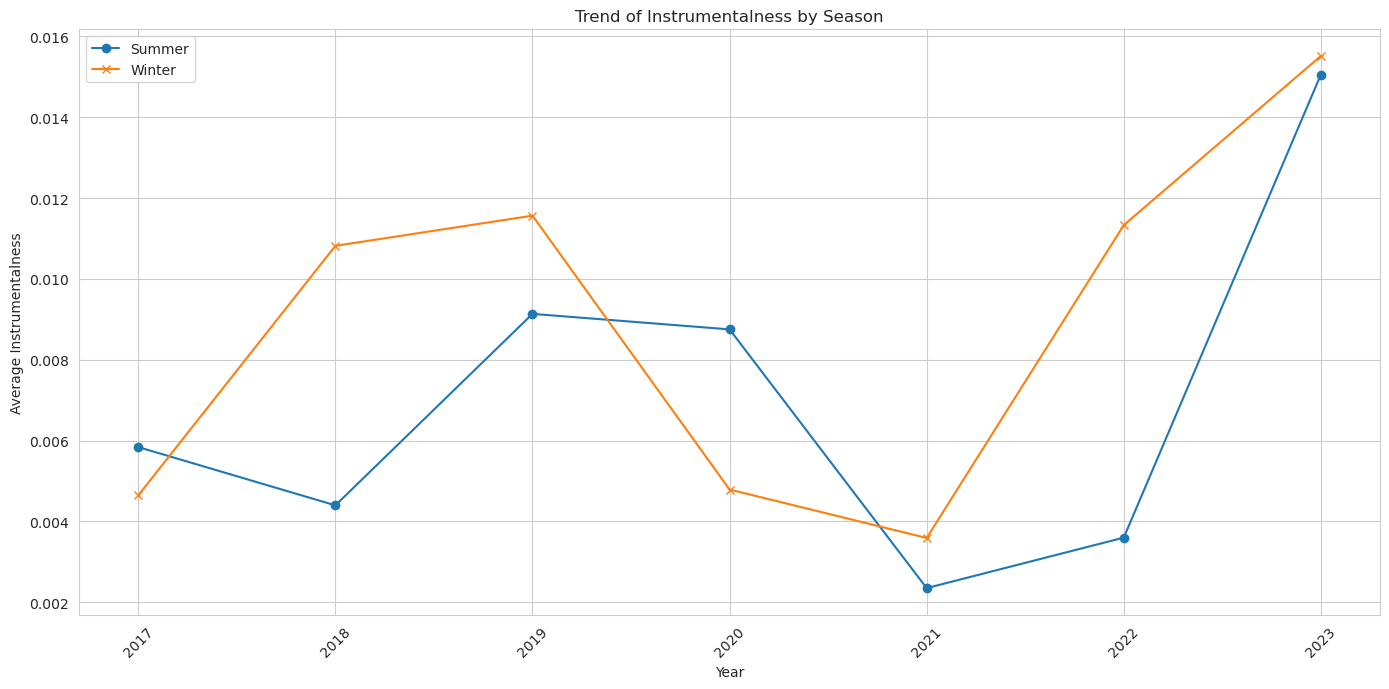

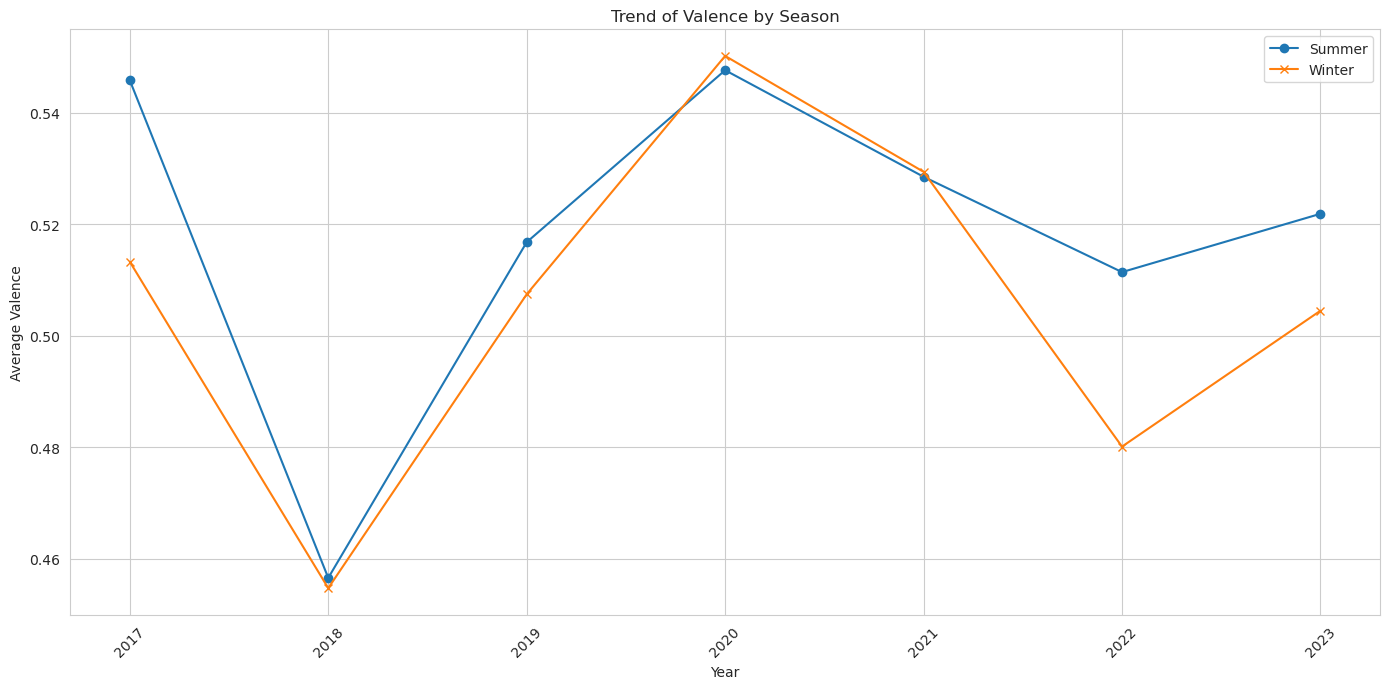

In [25]:
# Check if there are distinct music listening preferences in winter and summer seasons

# Convert the 'Date' column to datetime type and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Extract the quarter and year
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year

# Filter data for summer (Q2) and winter (Q4)
summer_data = df[(df['Quarter'] == 2) & (df['Rank'] <= 50)]
winter_data = df[(df['Quarter'] == 4) & (df['Rank'] <= 50)]

# Calculate the average features for summer and winter for each year
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']
summer_means = summer_data.groupby('Year')[features].mean()
winter_means = winter_data.groupby('Year')[features].mean()

# Plot the trend of each feature over time
for feature in features:
    plt.figure(figsize=(14, 7))
    plt.plot(summer_means.index, summer_means[feature], marker='o', label='Summer')
    plt.plot(winter_means.index, winter_means[feature], marker='x', label='Winter')
    plt.title(f'Trend of {feature} by Season')
    plt.xlabel('Year')
    plt.ylabel(f'Average {feature}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
    plt.show()


/tmp/ipykernel_140/3992045288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = scaler.fit_transform(df[features])


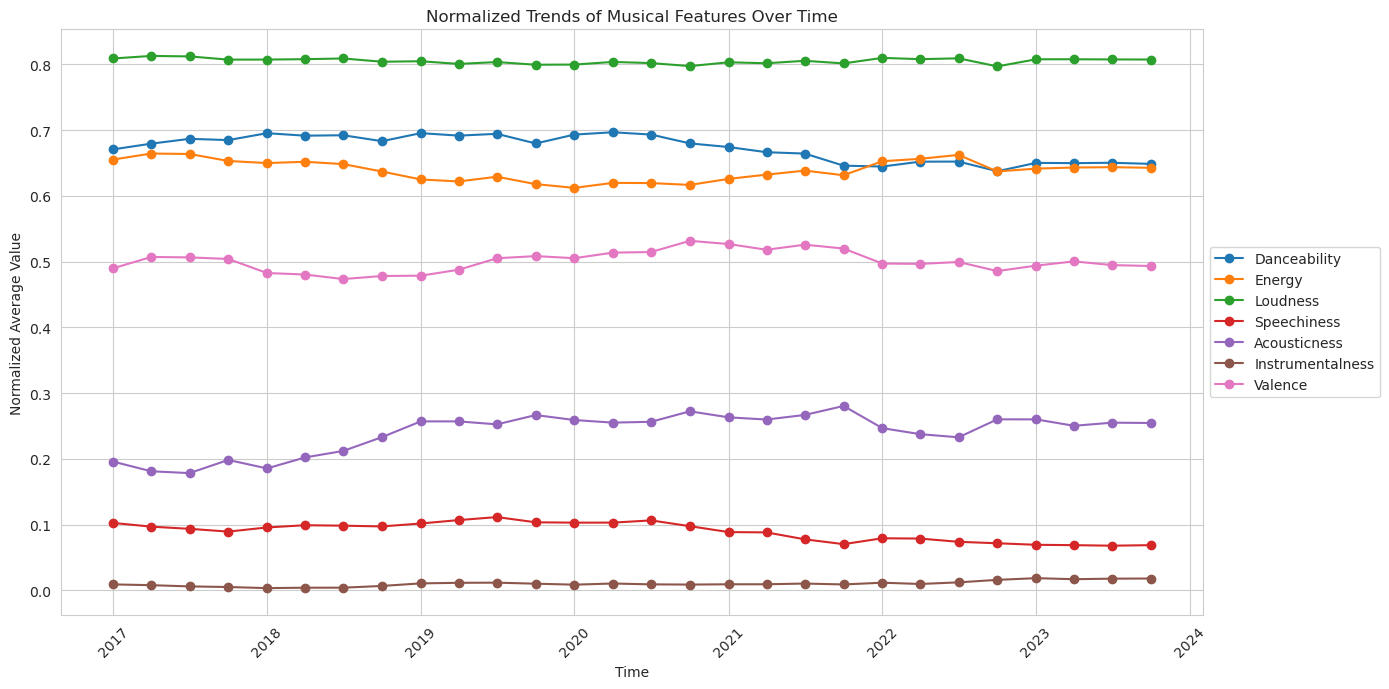

In [26]:
# Trend plots for various sound features over time



# Normalize the features
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Calculate the average values of each music feature for each quarter
quarterly_means = df.groupby(df['Date'].dt.to_period('Q'))[features].mean()

# Convert the quarterly index to timestamp for plotting
quarterly_means.index = quarterly_means.index.to_timestamp()

# Plot trends for all features
plt.figure(figsize=(14, 7))
for feature in features:
    plt.plot(quarterly_means.index, quarterly_means[feature], marker='o', label=feature)

# Configure the plot
plt.title('Normalized Trends of Musical Features Over Time')
plt.xlabel('Time')
plt.ylabel('Normalized Average Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('feature_trends.png')  # Save the plot as an image file
plt.show()


/tmp/ipykernel_140/1292445702.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(successful_songs[feature], shade=True, color="blue", label='Top 1-50', ax=axes[i])
/tmp/ipykernel_140/1292445702.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unsuccessful_songs[feature], shade=True, color="red", label='Rank 51-200', ax=axes[i])
/tmp/ipykernel_140/1292445702.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(successful_songs[feature], shade=True, color="blue", label='Top 1-50', ax=axes[i])
/tmp/ipykernel_140/1292445702.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

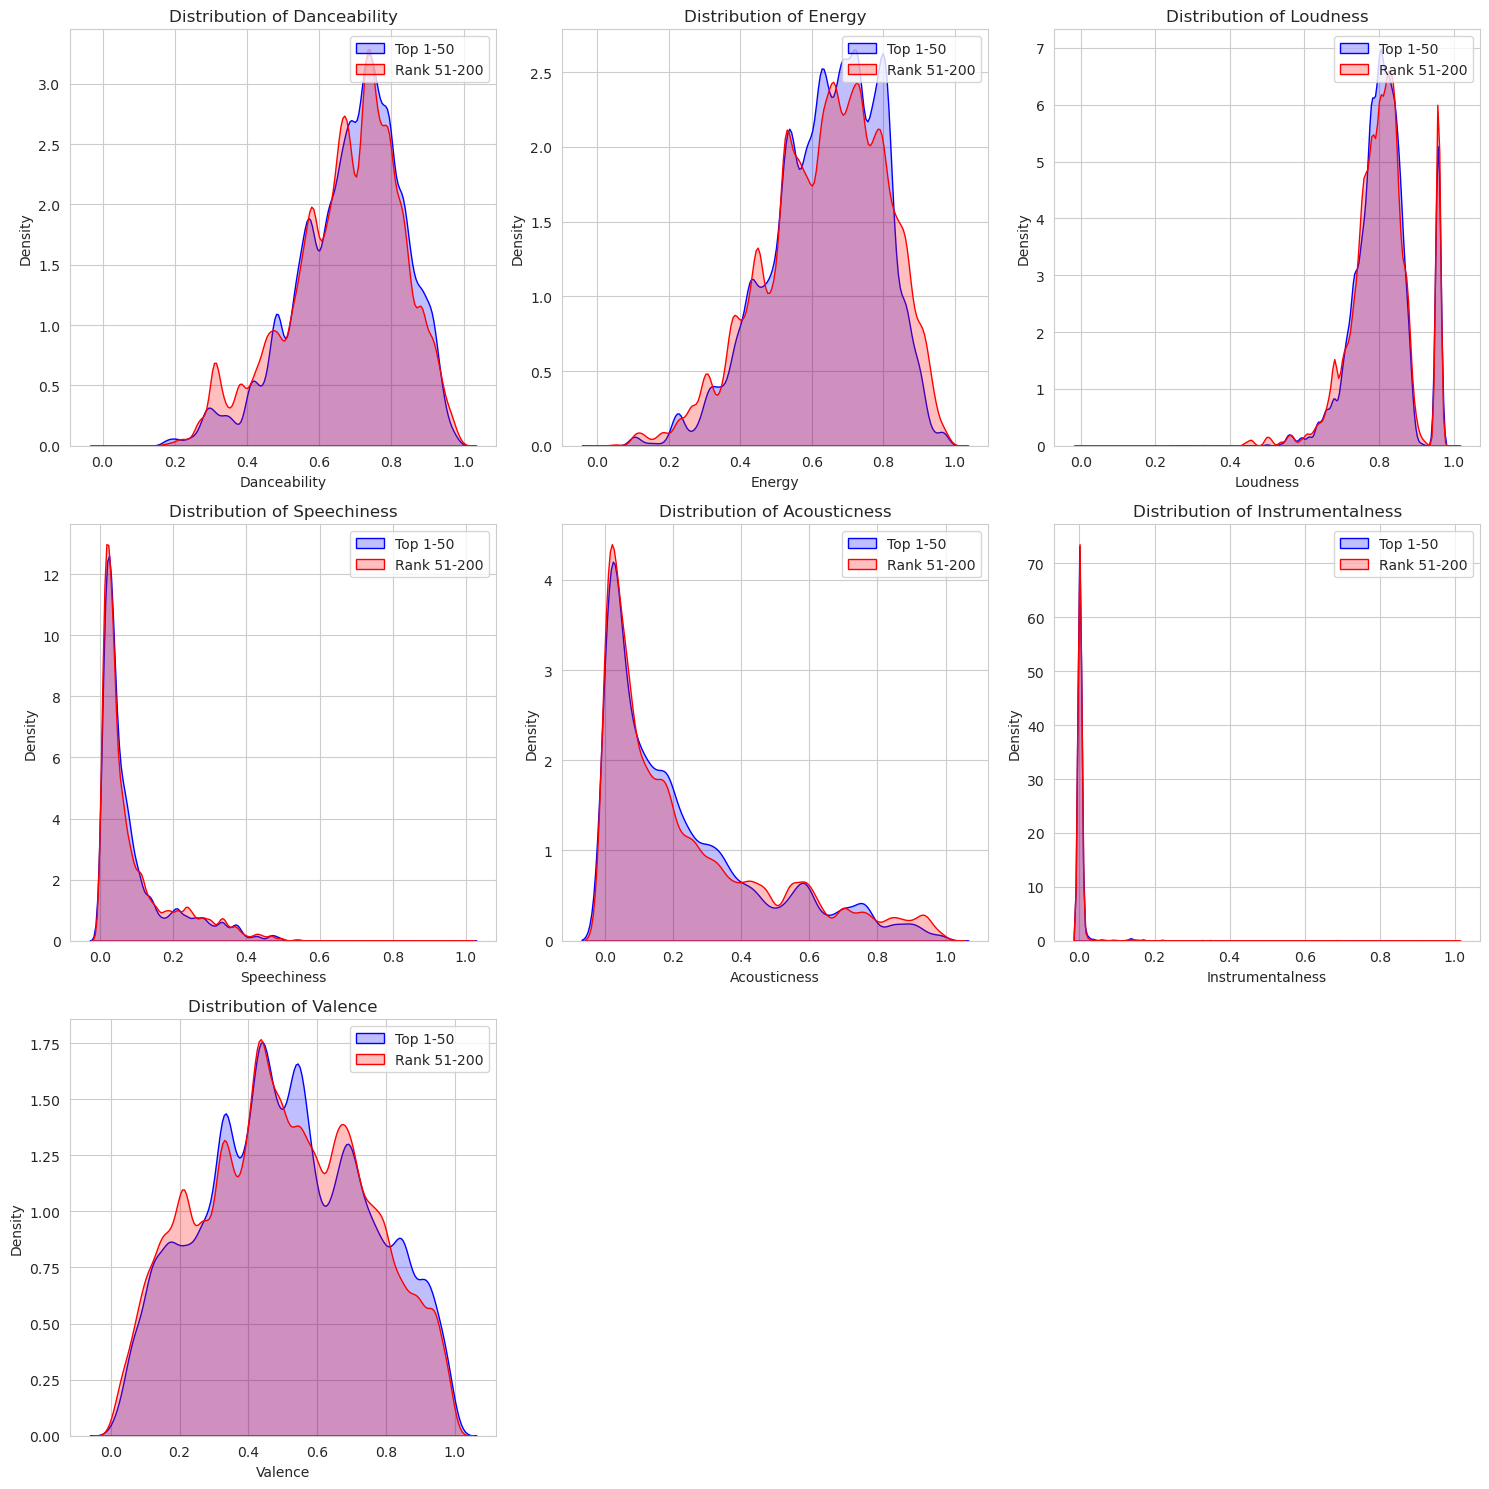

In [29]:
# Filter for successful and unsuccessful songs
successful_songs = df[df['Rank'] <= 50]
unsuccessful_songs = df[df['Rank'].between(51, 200)]

# Define music feature list
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']

# Setting up the matplotlib grid for subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3x3 grid of subplots
axes = axes.ravel()  # Flatten the array for easy iteration

# Plot probability distribution for each feature
for i, feature in enumerate(features):
    sns.kdeplot(successful_songs[feature], shade=True, color="blue", label='Top 1-50', ax=axes[i])
    sns.kdeplot(unsuccessful_songs[feature], shade=True, color="red", label='Rank 51-200', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend()

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
#plt.savefig("distribution_of_numeric_features.png")
plt.show()

In [ ]:
# Trend plots for various sound features over time

from sklearn.preprocessing import MinMaxScaler

# Normalize the features
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Calculate the average values of each music feature for each quarter
quarterly_means = df.groupby(df['Date'].dt.to_period('Q'))[features].mean()

# Convert the quarterly index to timestamp for plotting
quarterly_means.index = quarterly_means.index.to_timestamp()

# Plot trends for all features
plt.figure(figsize=(14, 7))
for feature in features:
    plt.plot(quarterly_means.index, quarterly_means[feature], marker='o', label=feature)

# Configure the plot
plt.title('Normalized Trends of Musical Features Over Time')
plt.xlabel('Time')
plt.ylabel('Normalized Average Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('feature_trends.png')  # Save the plot as an image file
plt.show()


In [58]:
# Find the song(s) with the longest duration on the chart

# Load the data, specifying the date format
df = pd.read_csv('Spotify_Dataset_V3.csv', sep=';', dayfirst=True, parse_dates=['Date'])

# Calculate the first and last charting dates for each song
first_last_dates = df.groupby(['Title', 'Artists']).agg(First_Date=('Date', 'min'), Last_Date=('Date', 'max')).reset_index()

# Calculate the duration of stay on the chart for each song
first_last_dates['Stay_Duration'] = (first_last_dates['Last_Date'] - first_last_dates['First_Date']).dt.days

# Find the song(s) with the longest stay duration
max_stay = first_last_dates['Stay_Duration'].max()
longest_staying_song = first_last_dates[first_last_dates['Stay_Duration'] == max_stay]

print("Longest staying song(s) on the chart:")
print(longest_staying_song)


Longest staying song(s) on the chart:
                     Title                Artists First_Date  Last_Date  \
1659           Die For You             The Weeknd 2017-01-01 2023-05-29   
4515        No Role Modelz                J. Cole 2017-01-01 2023-05-29   
5315              Reminder             The Weeknd 2017-01-01 2023-05-29   
5658  Say You Won't Let Go           James Arthur 2017-01-01 2023-05-29   
6054               Starboy  The Weeknd, Daft Punk 2017-01-01 2023-05-29   

      Stay_Duration  
1659           2339  
4515           2339  
5315           2339  
5658           2339  
6054           2339  


Top 20 songs with the most appearances on the chart:
Sunflower - Spider-Man: Into the Spider-Verse    3262
One Dance                                        2970
Something Just Like This                         2602
Closer                                           2532
Shallow                                          2518
Believer                                         2297
Happier                                          2271
Perfect                                          2260
lovely (with Khalid)                             2219
Shape of You                                     2206
Te Boté - Remix                                  2196
Señorita                                         2042
Say You Won't Let Go                             1971
Starboy                                          1926
Chi                                              1865
Cold Heart - PNAU Remix                          1835
Congratulations                                  1812
The Middle                   

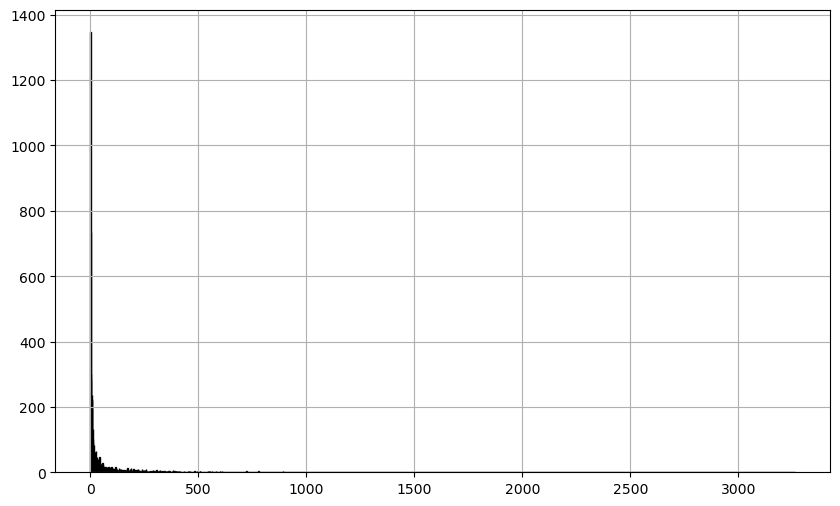

In [9]:
# Calculate the number of times each song has appeared on the chart over all time
chart_counts = df['Title'].value_counts()

# Plot a histogram of chart counts
plt.figure(figsize=(10, 6))
chart_counts.hist(bins=range(1, chart_counts.max() + 1), color='skyblue', edgecolor='black')


# Get the top 20 songs with the most appearances on the chart
top_20_chart_counts = chart_counts.head(20)

# Print the results
print("Top 20 songs with the most appearances on the chart:")
print(top_20_chart_counts)


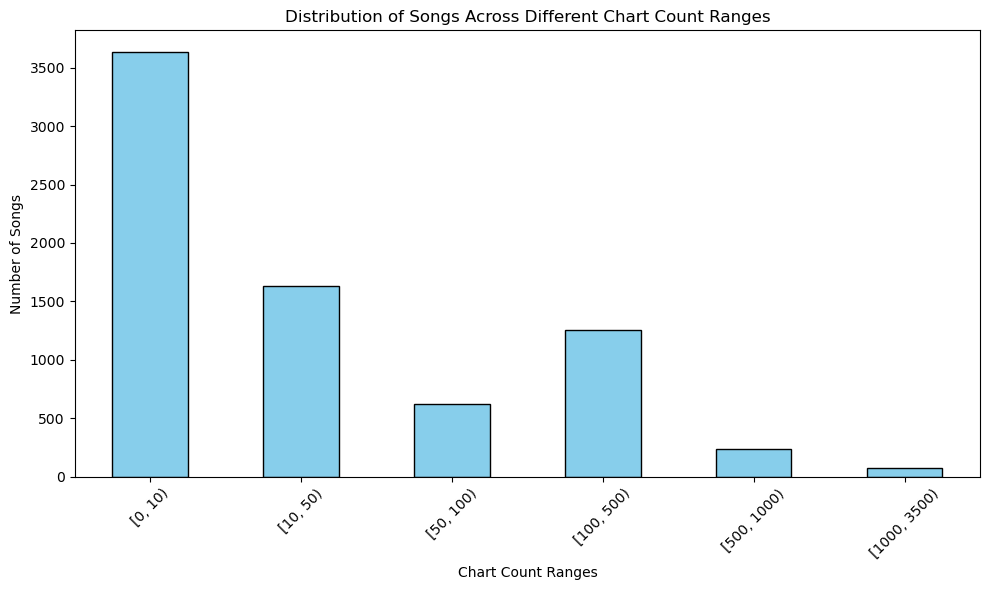

In [60]:
# Calculate the number of times each song has appeared on the chart and divide them into intervals

# Define bin boundaries
bins = [0, 10, 50, 100, 500, 1000, 3500]

# Use the `cut` function to group songs into intervals
groups = pd.cut(chart_counts, bins, right=False)

# Calculate the number of songs in each interval
grouped_counts = groups.value_counts().sort_index()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the chart title and axis labels
plt.title('Distribution of Songs Across Different Chart Count Ranges')
plt.xlabel('Chart Count Ranges')
plt.ylabel('Number of Songs')

# Display the chart
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()


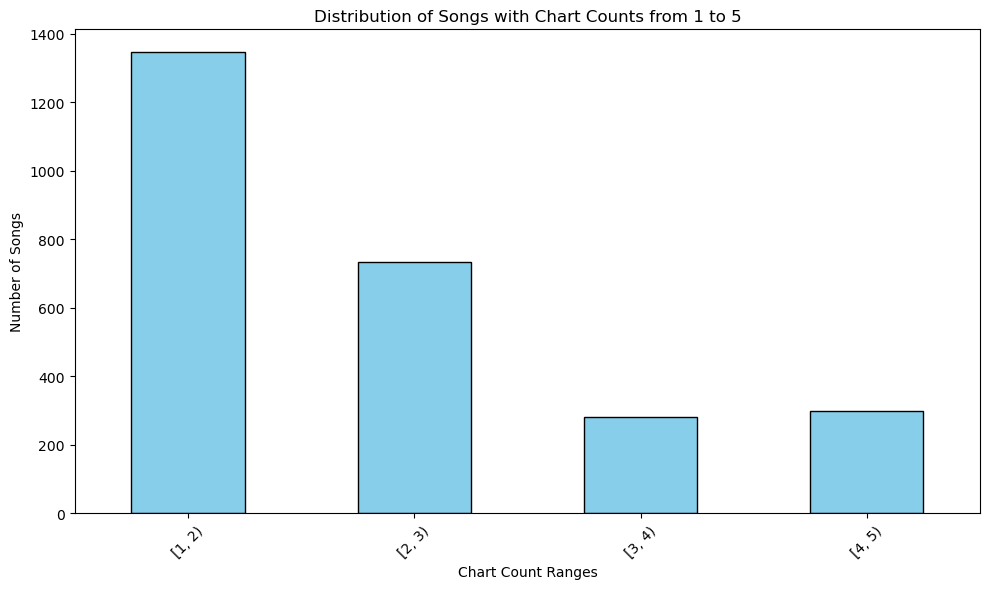

In [75]:
# Define bin boundaries to group songs based on chart counts (1 to 5 times)
bins = [1, 2, 3, 4, 5]

# Use the `cut` function to group songs
groups = pd.cut(chart_counts, bins, right=False)

# Calculate the number of songs in each group
grouped_counts = groups.value_counts().sort_index()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the chart title and axis labels
plt.title('Distribution of Songs with Chart Counts from 1 to 5')
plt.xlabel('Chart Count Ranges')
plt.ylabel('Number of Songs')

# Display the chart
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()


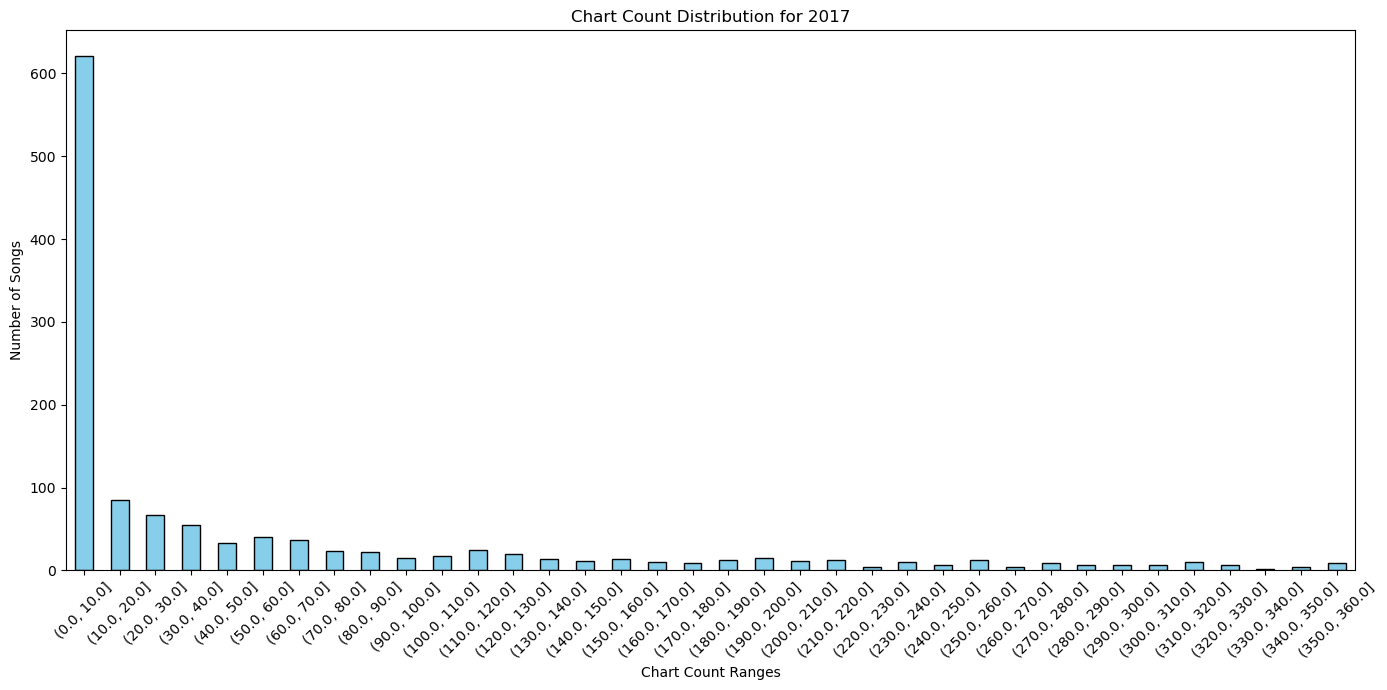

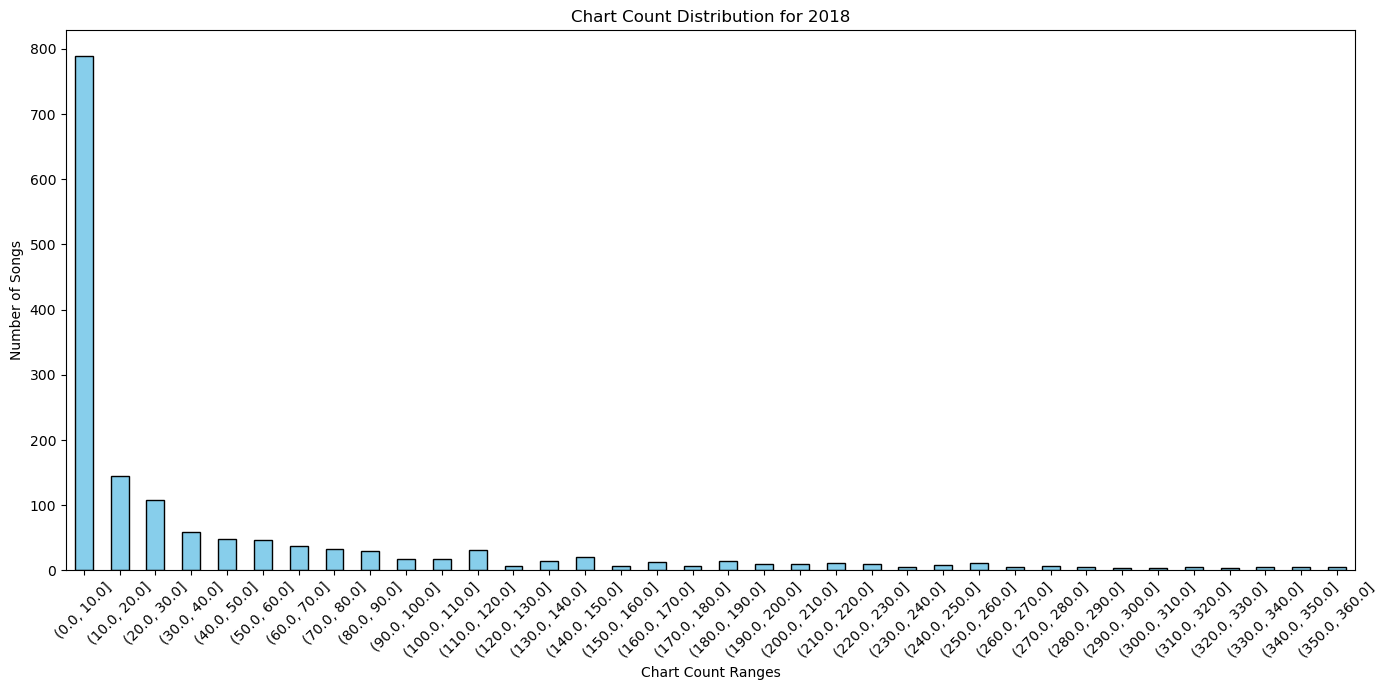

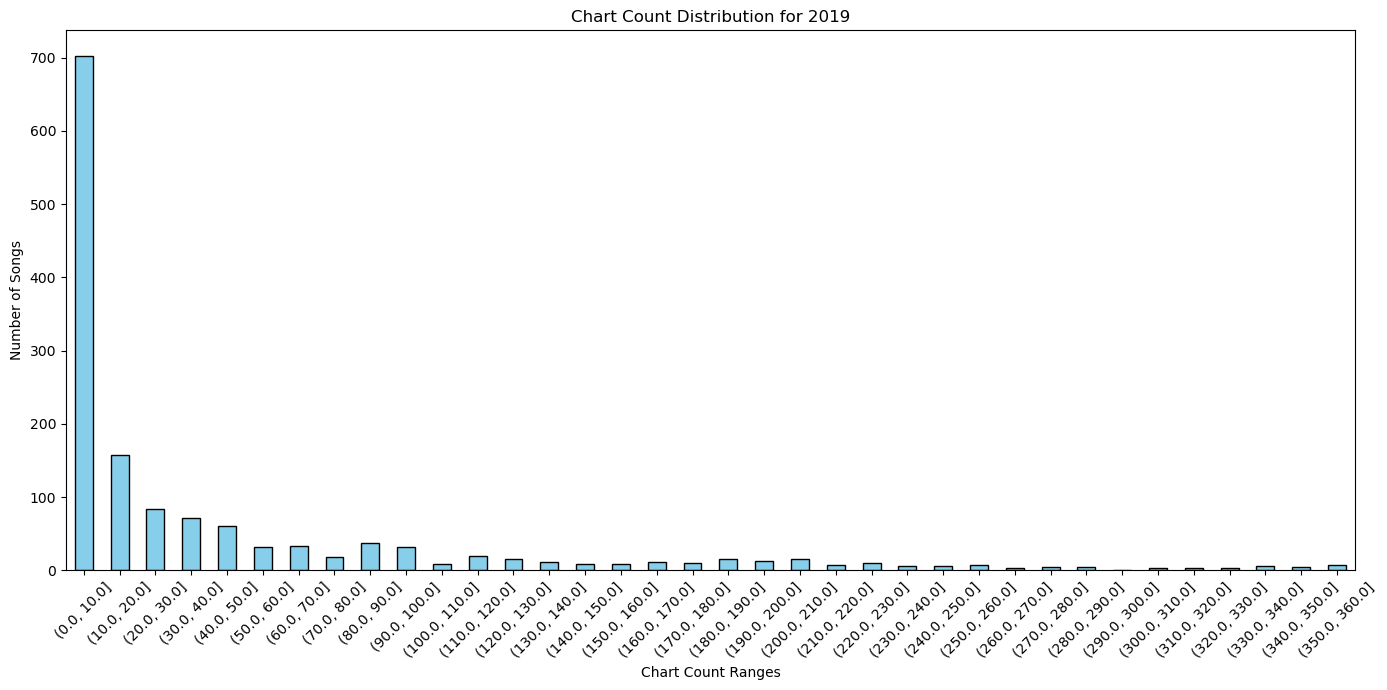

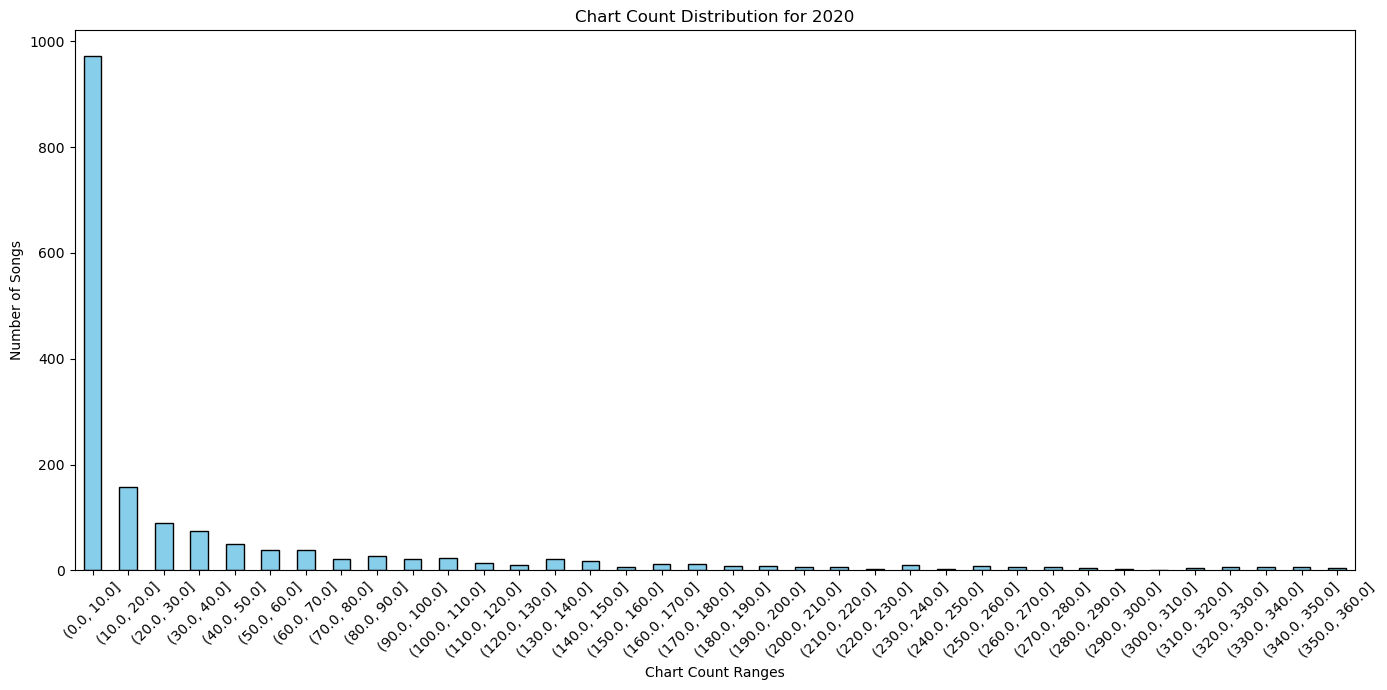

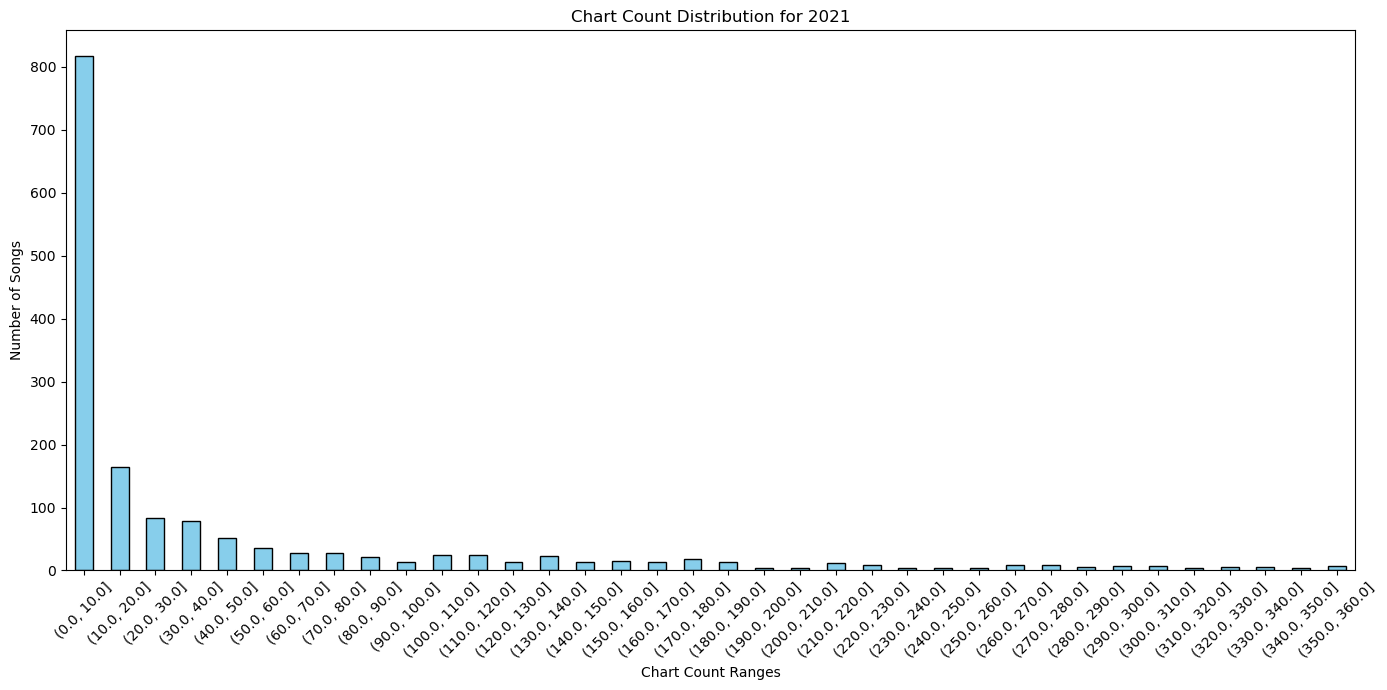

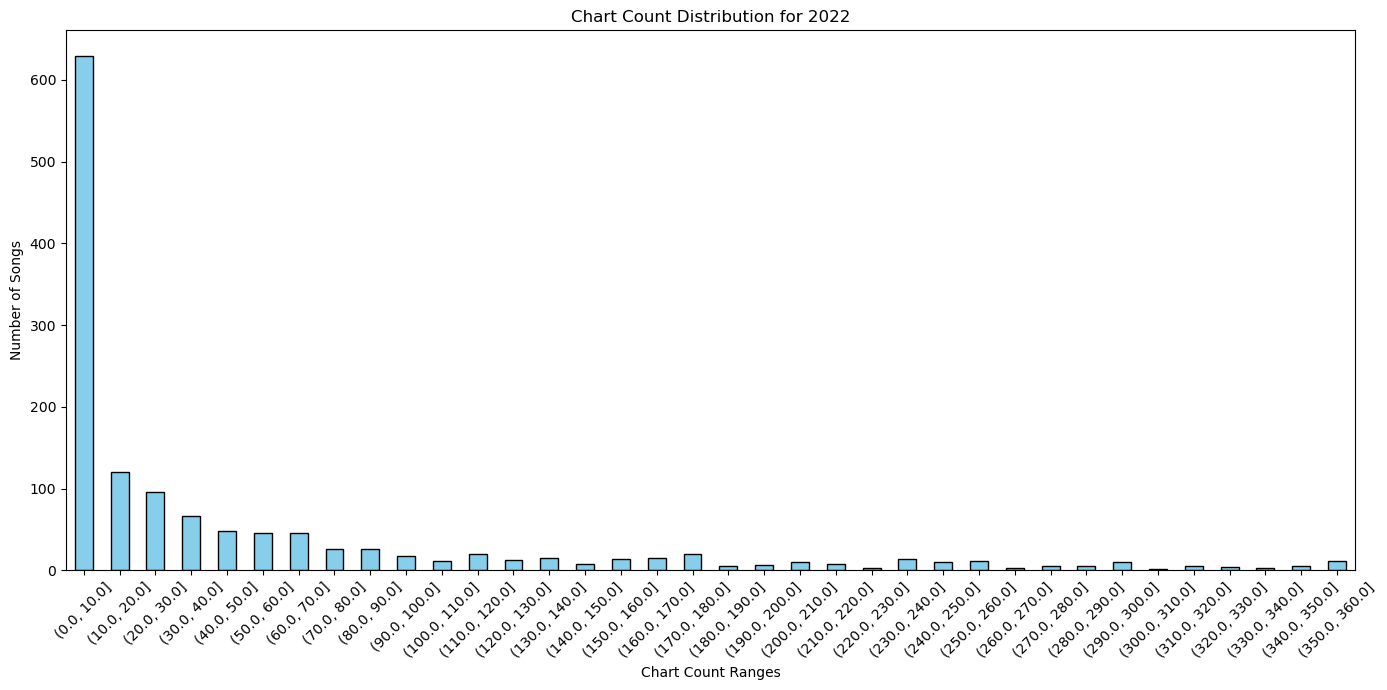

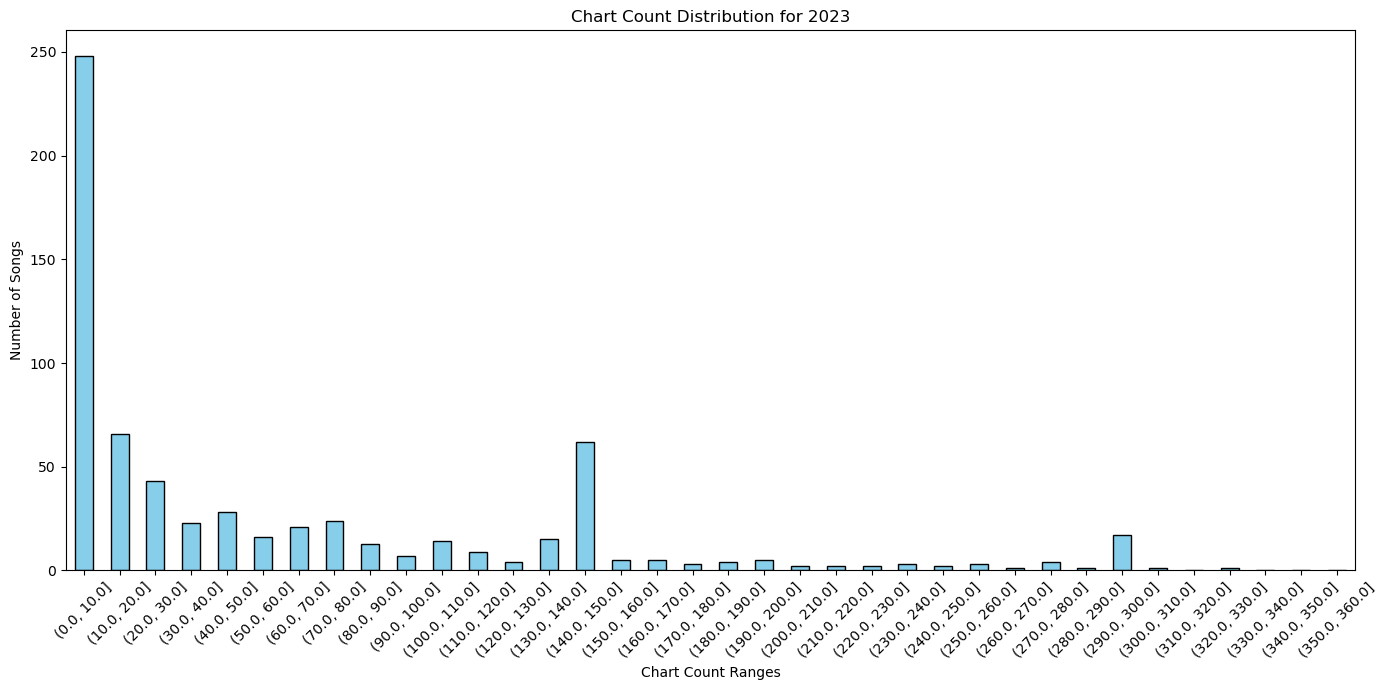

In [69]:
# Calculate the distribution of the number of times each song has appeared on the chart, segmented by year


# Convert the 'Date' column to datetime type and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Iterate through each year and plot the distribution
for year in sorted(df['Year'].unique()):
    # Get data for the current year
    yearly_data = df[df['Year'] == year]
    
    # Calculate the number of times each song appeared on the chart
    yearly_chart_counts = yearly_data['Title'].value_counts()
    
    # Define intervals for binning the x-axis
    bins = pd.interval_range(start=0, end=365, freq=(365 // 36.5))

    # Use the `cut` function to group songs into intervals
    yearly_chart_counts_grouped = pd.cut(yearly_chart_counts, bins=bins)

    # Calculate the number of songs in each group
    grouped_counts = yearly_chart_counts_grouped.value_counts().sort_index()

    # Create a bar chart to visualize the distribution
    plt.figure(figsize=(14, 7))
    grouped_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Set the chart title and axis labels
    plt.title(f'Chart Count Distribution for {year}')
    plt.xlabel('Chart Count Ranges')
    plt.ylabel('Number of Songs')
    
    # Display the chart
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust the layout to fit the labels
    plt.show()


/tmp/ipykernel_140/988252397.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_final.corr()


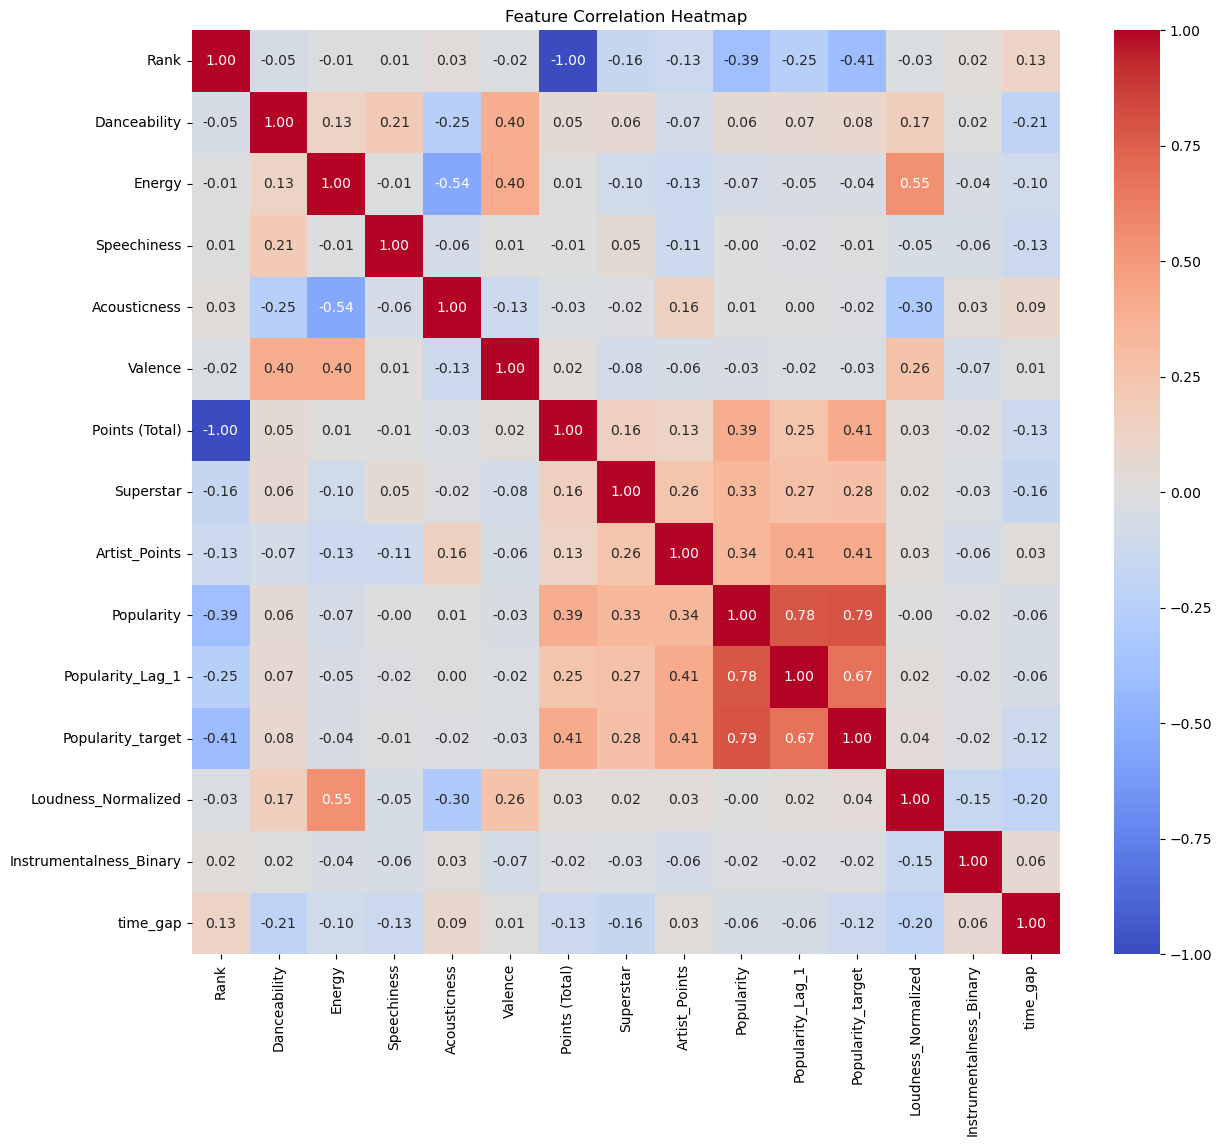

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Specify the file path
file_path = 'data_prepared_final.csv'

# Load the dataset
data_final = pd.read_csv(file_path, sep=',')

# Rename the column 'Popularity_Lag_-1' to 'Popularity_target'
data_final.rename(columns={'Popularity_Lag_-1': 'Popularity_target'}, inplace=True)

# Drop the columns 'release_Epoch', 'Epoch', 'Popularity_Lag_2', 'Popularity_Lag_3', and 'Top50_Counts'
data_final.drop(['release_Epoch', 'Epoch', 'Popularity_Lag_2', 'Popularity_Lag_3', 'Top50_Counts'], axis=1, inplace=True)

# Calculate the correlation matrix
corr_matrix = data_final.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.savefig('heatmap.png')
plt.show()
